QUESTION 1:

Problem Statement for Aerofit Dataset:
Given the attributes related to Aerofit product usage, such as product type, age, gender, education, marital status, frequency of usage, fitness level, income, and expected miles run, we can dive deep into :

"How can Aerofit better understand its customer base to tailor its marketing, sales, and product strategies, maximizing user satisfaction and profitability?"

This problem statement guides the analytical process towards understanding various factors(age, gender,maritalstatus....etc) and patterns that play a role in a customer's decision to purchase or use Aerofit products.


Analyzing Basic Metrics:

1. Shape of Data:
Understanding the size (rows and columns) of your dataset gives you an idea of the volume of data we are dealing with. It helps in determining if we have sufficient data for meaningful analyses or if there are too many features (potential for dimensionality reduction).

2. Data Types of Attributes:
Before diving into any analysis, understanding the data type of each attribute is crucial. It helps in deciding the kind of operations and statistical methods that can be applied to each attribute.

3. Conversion of Categorical Attributes:
In many datasets, categorical attributes (like 'Gender' or 'MaritalStatus') may be represented as strings or integers. For efficient processing and accurate analysis, converting them to a 'category' data type in programming languages like Python can be beneficial. This also helps in reducing memory consumption.

4. Statistical Summary:
This is a preliminary step to get a "feel" for the data:

Central Tendency: Understand the average and median of the data.
Dispersion: See the spread of the data through measures like standard deviation.
Frequency: For categorical data, understanding how often each category appears is essential.
Range: Knowing the minimum and maximum values helps in understanding the bounds of numeric data.

5. Checking for Missing Values:
Before diving deep into analysis, it's crucial to identify if there are any missing values in the dataset. If there are, decisions need to be made about how to handle them, e.g., imputation or removal.

6. Identifying Potential Outliers:
Outliers can distort the results of the analysis. Using methods like visual box-plots or IQR (Interquartile Range) can help in spotting and handling outliers.

In conclusion, the combination of a well-defined problem statement and a preliminary analysis using basic metrics sets the stage for more sophisticated analyses and data modeling. It ensures that further steps are taken with a clear direction and understanding of the dataset at hand.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv("/content/resource/aerofit_treadmill.txt")

SHAPE OF THE DATA


In [ ]:
df.shape

(180, 9)

In [ ]:
df.head()


Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

DATA TYPE OF THE DATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


STATISTICAL SUMMARY OF THE DATA

In [ ]:
df.describe()

Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000

CONVERTING INTO CATEGORICAL ATTRIBUTE

In [ ]:
df['Product'] = df['Product'].astype('category')

In [ ]:
df['Gender'] = df['Gender'].astype('category')

df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


DETECTING OUTLIERS

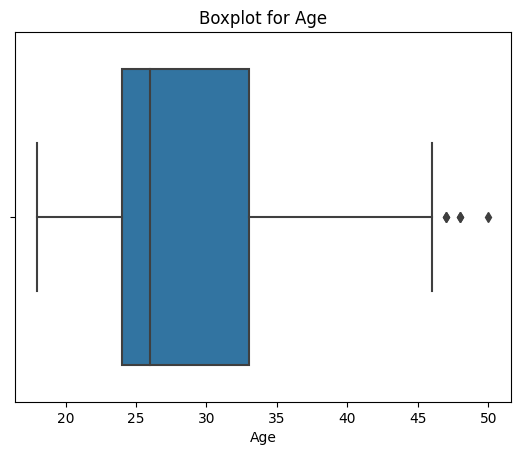

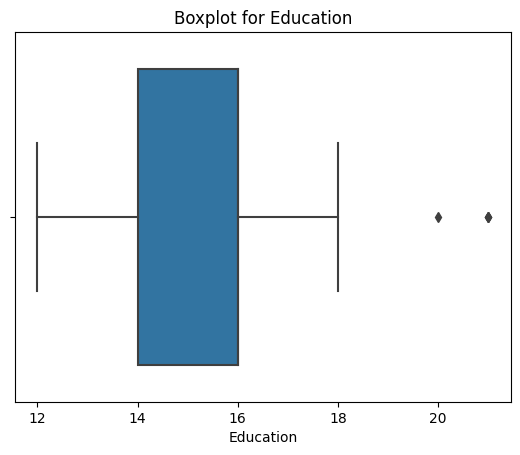

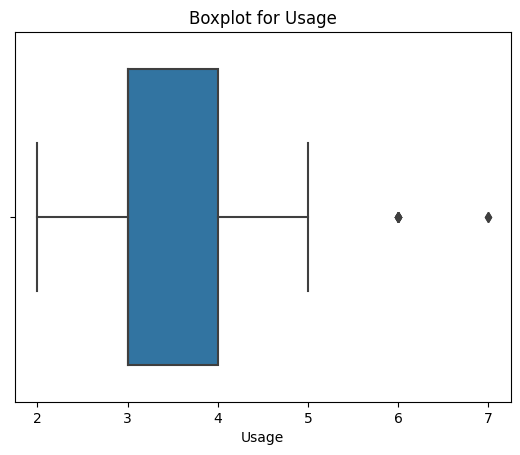

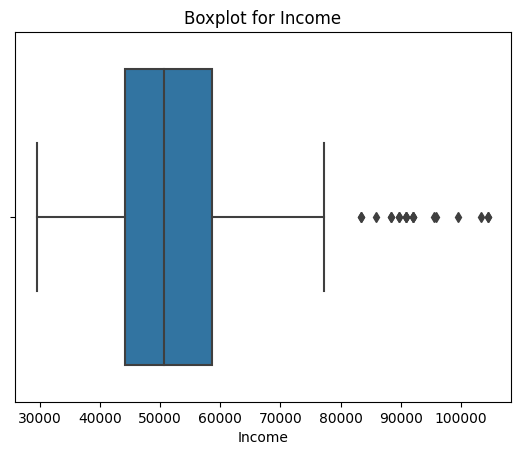

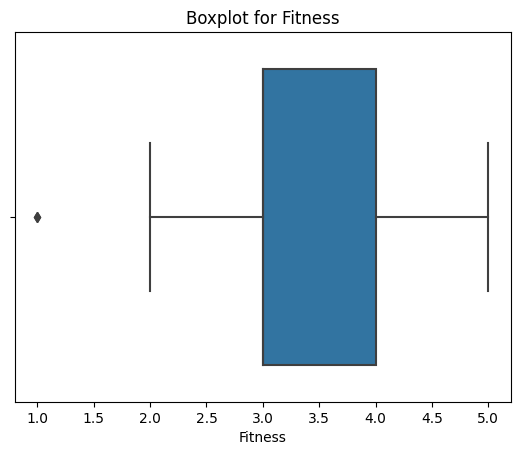

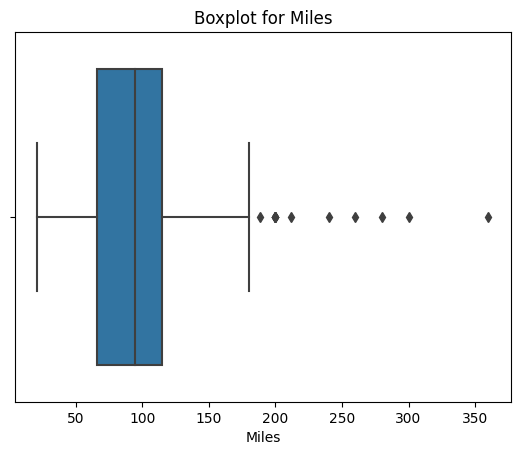

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

AFFECTS OF FEATURES ON PRODUCT PURCHASE


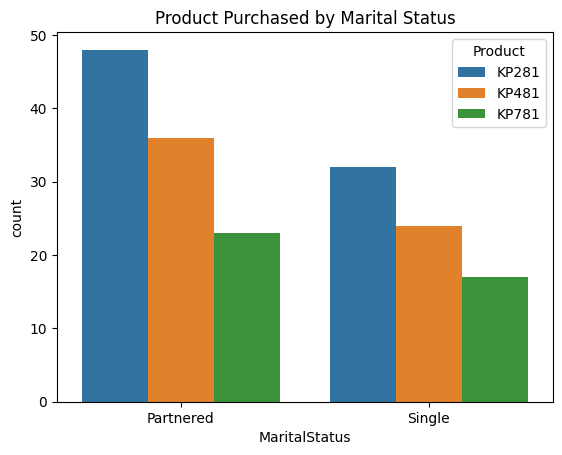

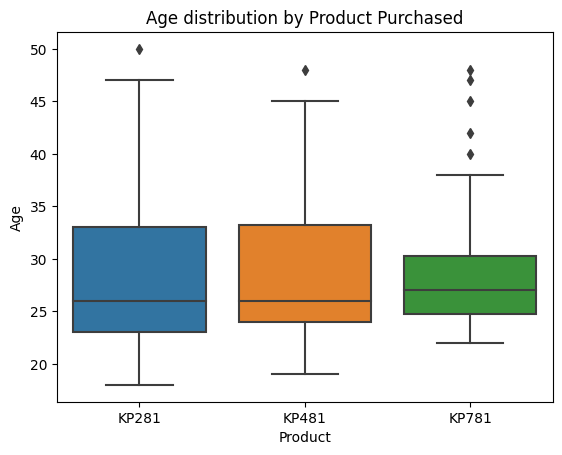

In [ ]:
sns.countplot(x='MaritalStatus', hue='Product', data=df)
plt.title('Product Purchased by Marital Status')
plt.show()

sns.boxplot(x='Product', y='Age', data=df)
plt.title('Age distribution by Product Purchased')
plt.show()

MARGINAL PROBABILITY

In [ ]:
# Calculating the marginal probabilities
product_counts = df['Product'].value_counts()
print(product_counts)
total_entries = len(df)
marginal_probabilities = product_counts / total_entries

# Displaying the marginal probabilities
print(marginal_probabilities)

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64


In [ ]:
product_table = pd.crosstab(index=df['Product'], columns='count', normalize=True) * 100
product_table

col_0        count
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222

CHECKING CORRELATION BETWEEN DIFFERENT FACTORS

<ipython-input-19-eb799ab7fd5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


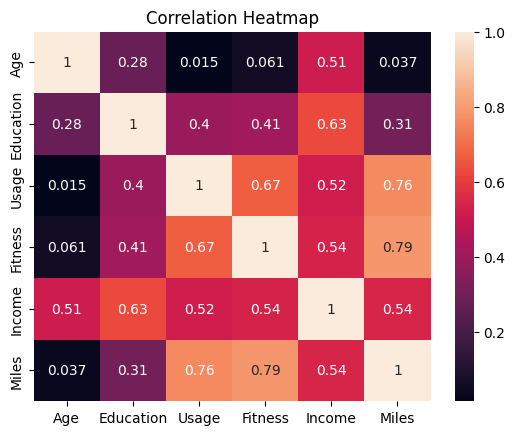

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()



We can observe higher correlations among:

1. Fitness and miles
2. Usage and miles
3. Usage and Fitness
4. Education and Income

PAIRPLOT


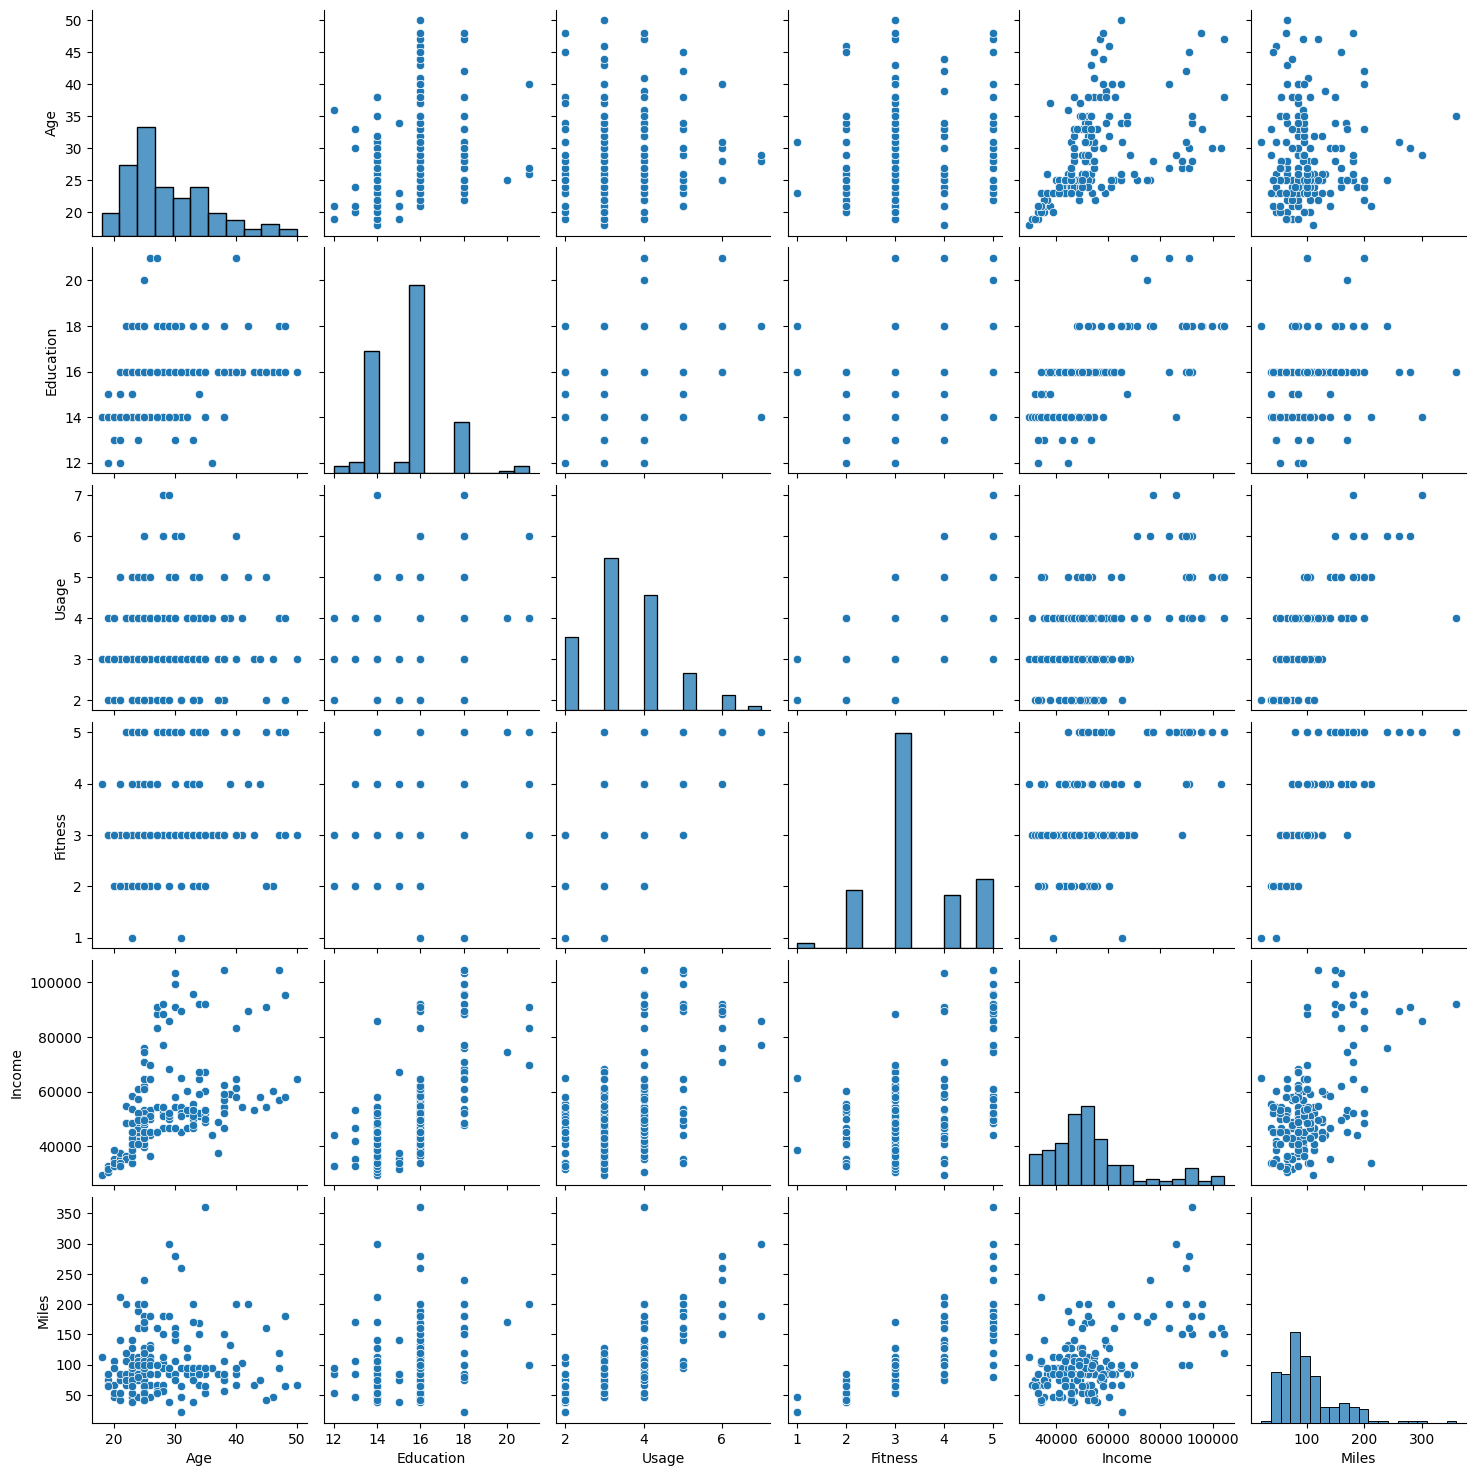

In [ ]:
sns.pairplot(df)
plt.show()

CUSTOMER PROFILING based on the product

In [ ]:
kp281_df = df[df['Product'] == 'KP281']
kp281_df.describe()


Age  Education      Usage   Fitness       Income       Miles
count  80.000000  80.000000  80.000000  80.00000     80.00000   80.000000
mean   28.550000  15.037500   3.087500   2.96250  46418.02500   82.787500
std     7.221452   1.216383   0.782624   0.66454   9075.78319   28.874102
min    18.000000  12.000000   2.000000   1.00000  29562.00000   38.000000
25%    23.000000  14.000000   3.000000   3.00000  38658.00000   66.000000
50%    26.000000  16.000000   3.000000   3.00000  46617.00000   85.000000
75%    33.000000  16.000000   4.000000   3.00000  53439.00000   94.000000
max    50.000000  18.000000   5.000000   5.00000  68220.00000  188.000000

In [ ]:

kp481_df = df[df['Product'] == 'KP481']
kp481_df.describe()


Age  Education      Usage   Fitness        Income       Miles
count  60.000000  60.000000  60.000000  60.00000     60.000000   60.000000
mean   28.900000  15.116667   3.066667   2.90000  48973.650000   87.933333
std     6.645248   1.222552   0.799717   0.62977   8653.989388   33.263135
min    19.000000  12.000000   2.000000   1.00000  31836.000000   21.000000
25%    24.000000  14.000000   3.000000   3.00000  44911.500000   64.000000
50%    26.000000  16.000000   3.000000   3.00000  49459.500000   85.000000
75%    33.250000  16.000000   3.250000   3.00000  53439.000000  106.000000
max    48.000000  18.000000   5.000000   4.00000  67083.000000  212.000000

In [ ]:

kp781_df = df[df['Product'] == 'KP781']
kp781_df.describe()

Age  Education      Usage    Fitness        Income       Miles
count  40.000000  40.000000  40.000000  40.000000      40.00000   40.000000
mean   29.100000  17.325000   4.775000   4.625000   75441.57500  166.900000
std     6.971738   1.639066   0.946993   0.667467   18505.83672   60.066544
min    22.000000  14.000000   3.000000   3.000000   48556.00000   80.000000
25%    24.750000  16.000000   4.000000   4.000000   58204.75000  120.000000
50%    27.000000  18.000000   5.000000   5.000000   76568.50000  160.000000
75%    30.250000  18.000000   5.000000   5.000000   90886.00000  200.000000
max    48.000000  21.000000   7.000000   5.000000  104581.00000  360.000000

CHECKING FOR ANY MISSING VALUES OR NAN COUNTS

In [ ]:
nan_counts = df.applymap(lambda x :   x == 'nan').sum()
nan_counts

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#Question 2. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

In [ ]:
# Analysis function
def analyze_column(column_name):
    unique_values = df[column_name].unique()
    value_counts = df[column_name].value_counts()
    print(f"{column_name}:\nUnique Values: {unique_values}\nValue Count: \n{value_counts}\n")

# Analyze each column
columns_to_analyze = ['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']

for column in columns_to_analyze:
    analyze_column(column)

Product:
Unique Values: ['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
Value Count: 
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Age:
Unique Values: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Value Count: 
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

Gender:
Unique Values: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Value Count: 
Male      104
Female     76
Name: Gender, dtype: int64

Education:
Unique Values: [14 15 12 13 16 18 20 21]
Value Count: 
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

MaritalStatus:
Unique Values: ['Single', 'Partn

Based on the provided snippet of the Aerofit dataset, here's a non-graphical analysis:

**Product**:
1. *Unique Values:* ['KP281' 'KP481' 'KP781']
2. *Value Count*:


```
KP281    80
KP481    60
KP781    40

```

There are just 3 products with KP281 being the most popular.


---

**Age**:

1. *Unique Values*: age ranges from 18 to 50.
2.
```
Value Count:
25    25
23    18
24    12
26    12
28     9
```
The products are most popular among 25-28 age group

---


**Gender**:
1. Unique Values: ['Male' 'Female']
2.
```
Value Count:
Male      104
Female     76
```

The number of male users are approx 50% higher with respect to female users.

---


**Education**:


```
Unique Values: [14 15 12 13 16 18 20 21]
Value Count:
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
```

The products are most popular among users with 16-18 years of education.


---


**MaritalStatus:**


```
Unique Values: ['Single', 'Partnered']

Value Count:
Partnered    107
Single        73
```

The product is more popular among partnered users.

---


**Usage**:


```
Unique Values: [3 2 4 5 6 7]
Value Count:
3    69
4    52
2    33
5    17
6     7
7     2
```
Most popular among moderate usage.


---


**Fitness**:


```
Unique Values: [4 3 2 1 5]
Value Count:
3    97
5    31
2    26
4    24
1     2
```
Most popular among moderate fitness level


---


**Income**:


```
Unique Values: [ 29562..104581]
Value Count:
45480    14
52302     9
46617     8
54576     8
53439     8
         ...
95508     1
```
Most popular among mid income group




---



**`Miles`**:

```
Unique Values: [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]
Value Count:
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
.....
21      1
```
Most popular miles count lies between 75 to 113 miles.

# Question 3. Visual Analysis - Univariate & Bivariate (30 Points)
1. For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
2. For categorical variable(s): Boxplot (10 Points)
3. For correlation: Heatmaps, Pairplots(10 Points)




### 3.1 Univariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


3.1.1 Univariate Analysis for continuous variable and Category variable

<ipython-input-27-3d469af8080d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde=True)


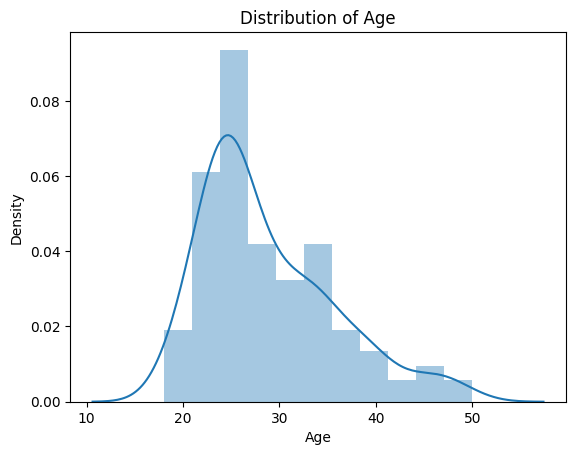

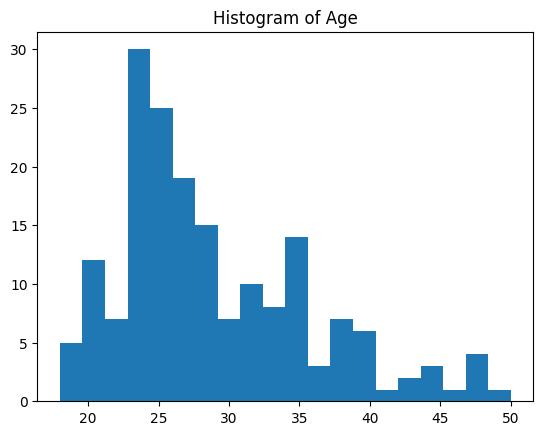

<ipython-input-27-3d469af8080d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde=True)


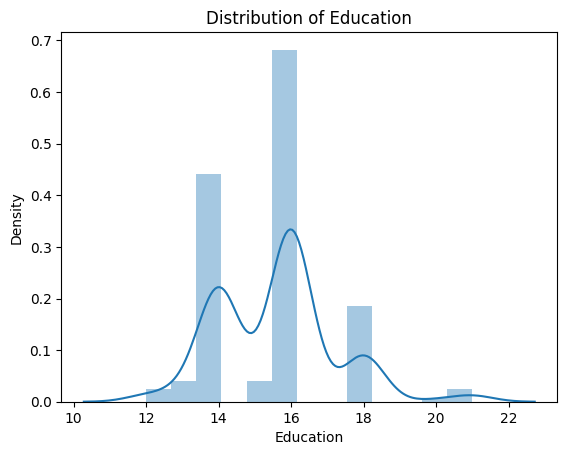

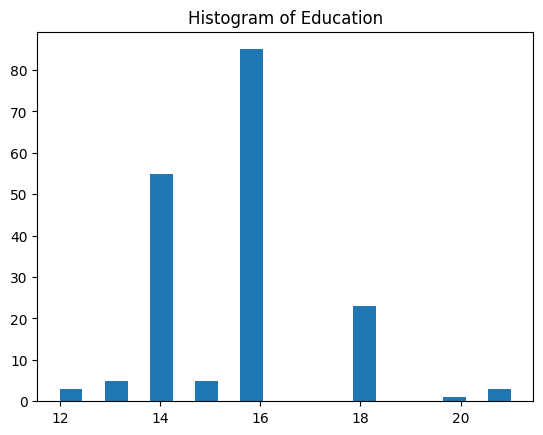

<ipython-input-27-3d469af8080d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde=True)


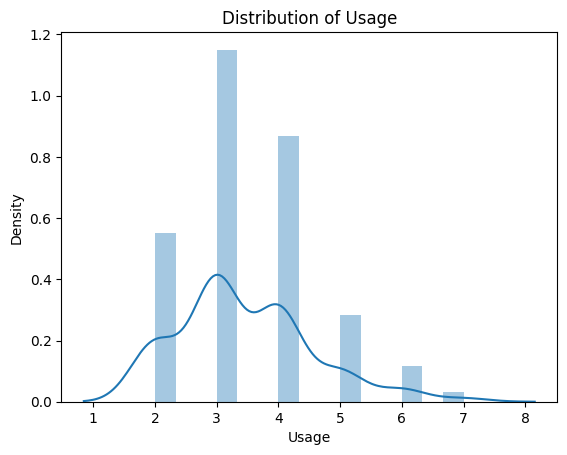

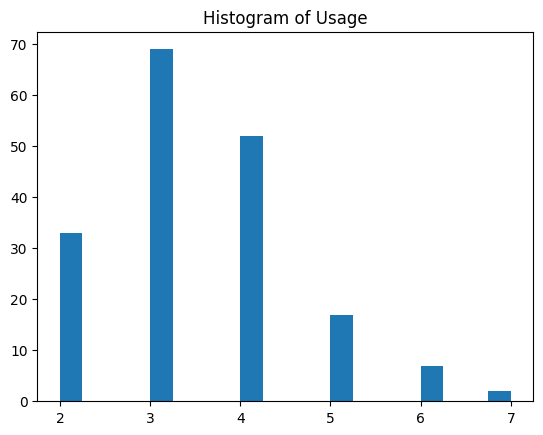

<ipython-input-27-3d469af8080d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde=True)


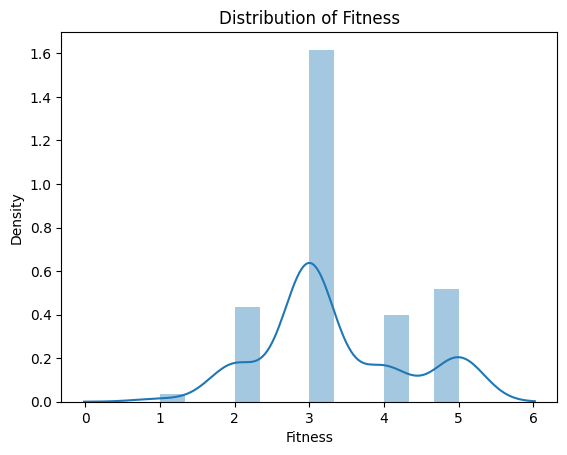

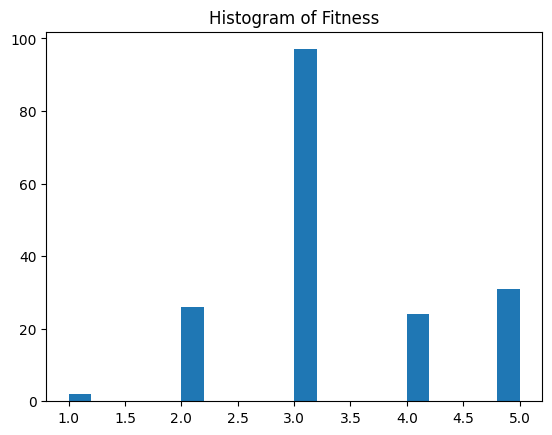

<ipython-input-27-3d469af8080d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde=True)


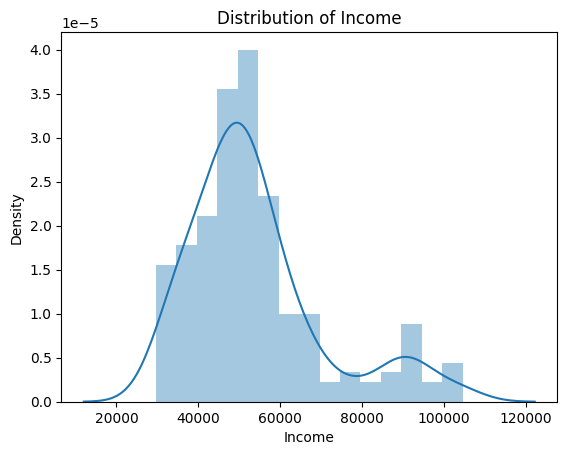

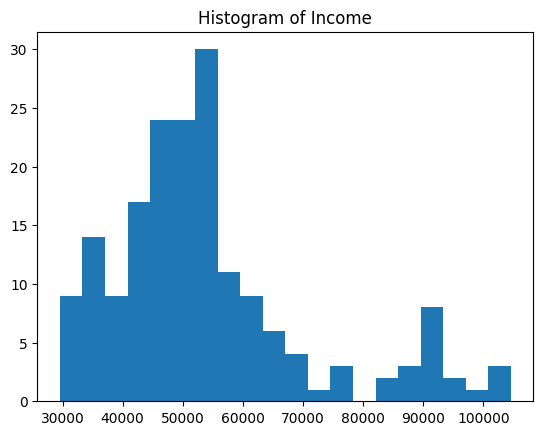

<ipython-input-27-3d469af8080d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde=True)


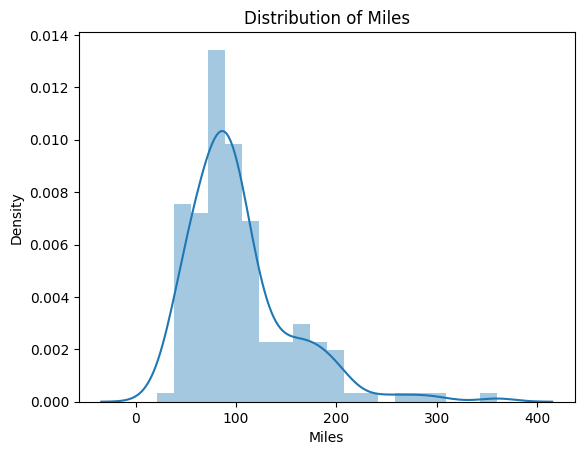

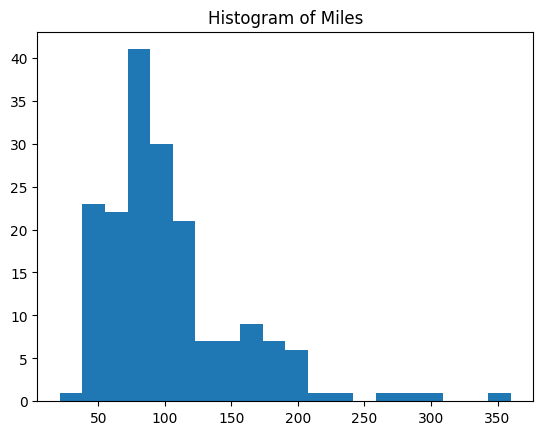

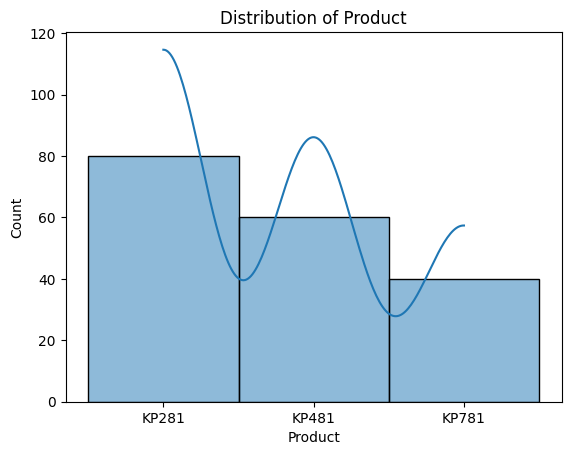

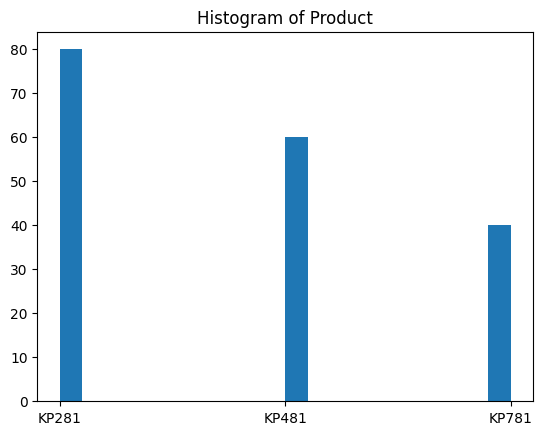

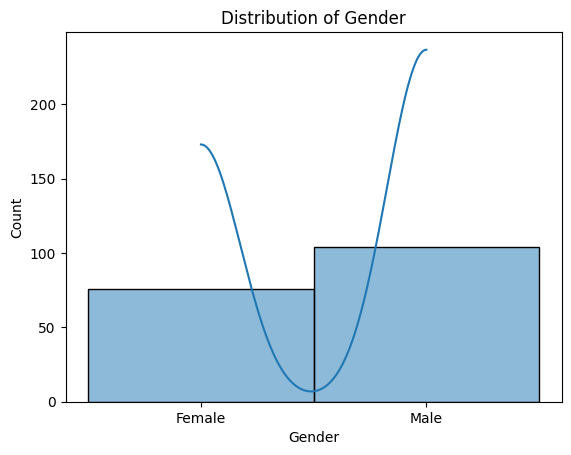

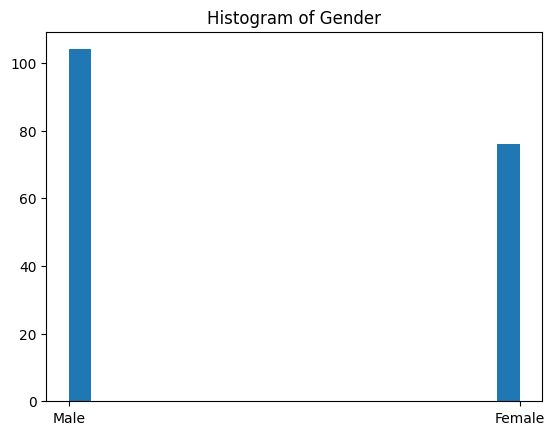

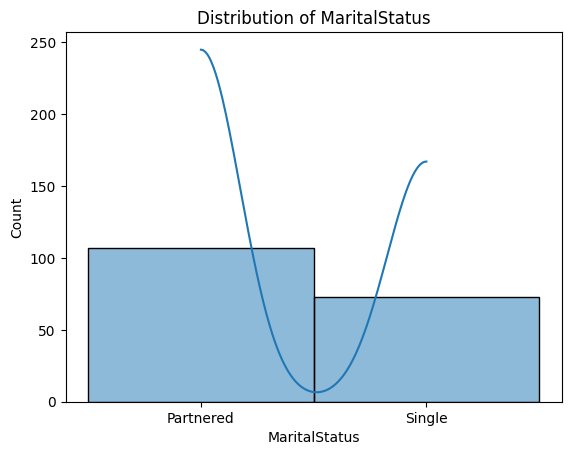

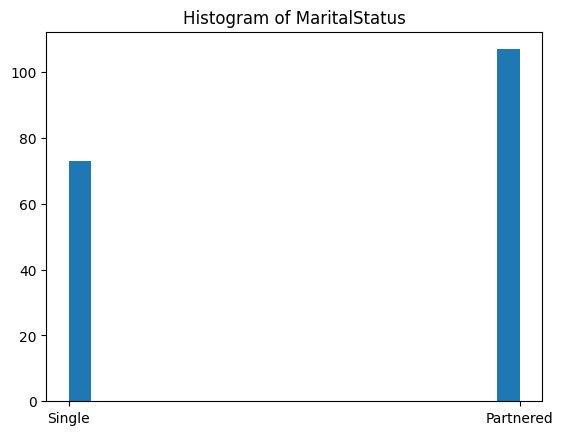

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous variables: Age, Education, Usage, Fitness, Income, Miles
category_vars = ['Product','Gender', 'MaritalStatus']
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

for var in continuous_vars:
    sns.distplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

    plt.hist(df[var], bins=20)
    plt.title(f'Histogram of {var}')
    plt.show()



for var in category_vars:
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

    plt.hist(df[var], bins=20)
    plt.title(f'Histogram of {var}')
    plt.show()

### 3.2 Bivariate Analysis

3.2.1 Bivariate analysis for continuous var Vs categorical data

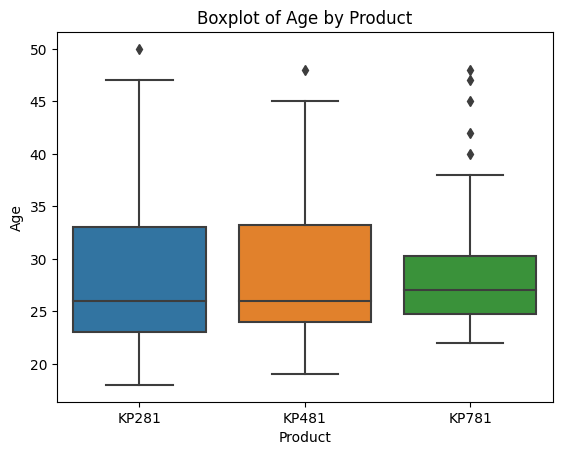

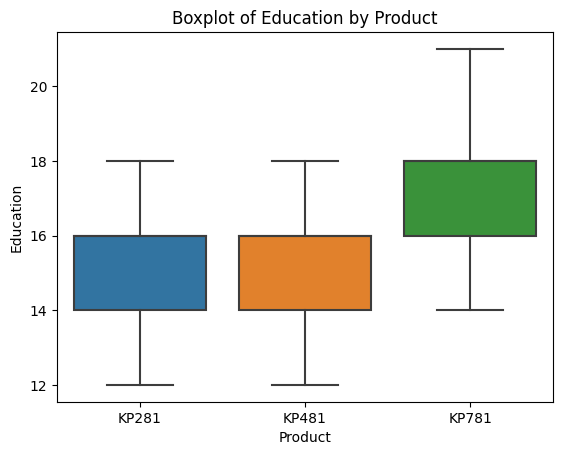

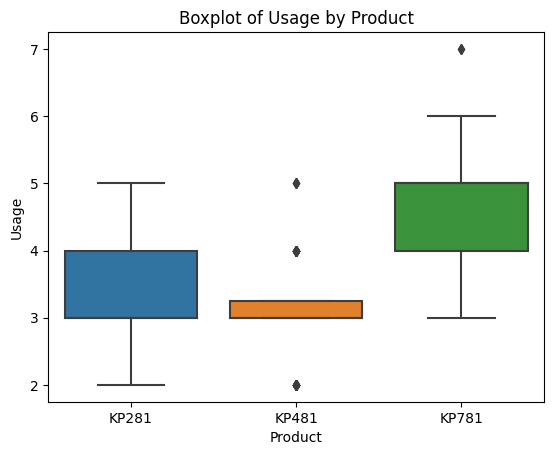

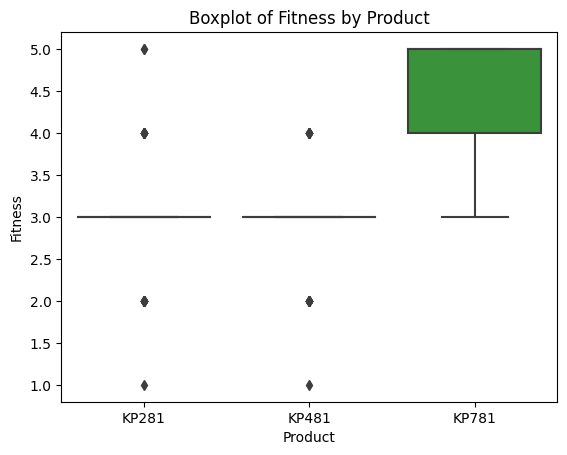

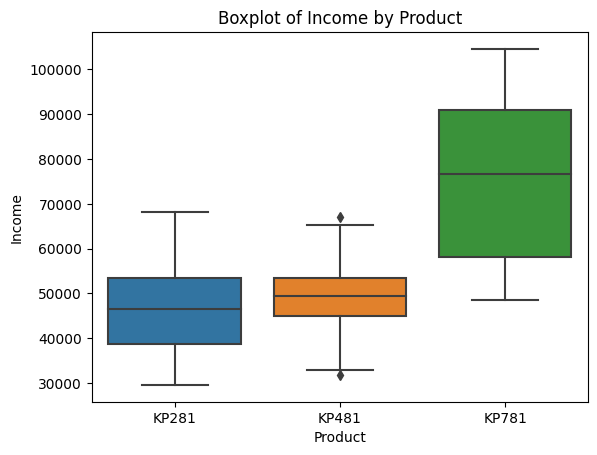

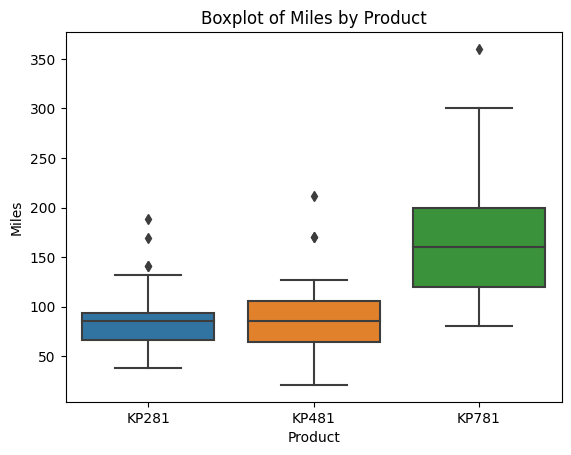

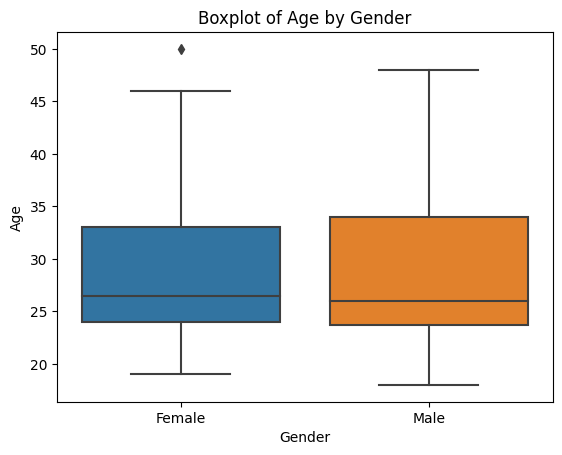

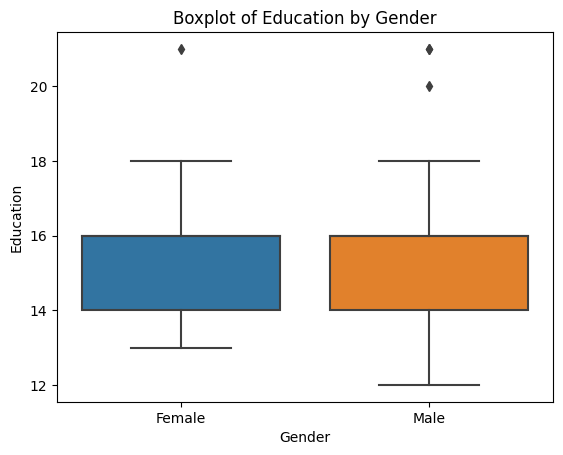

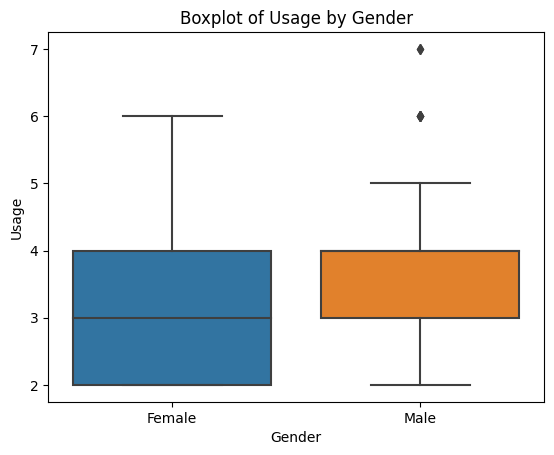

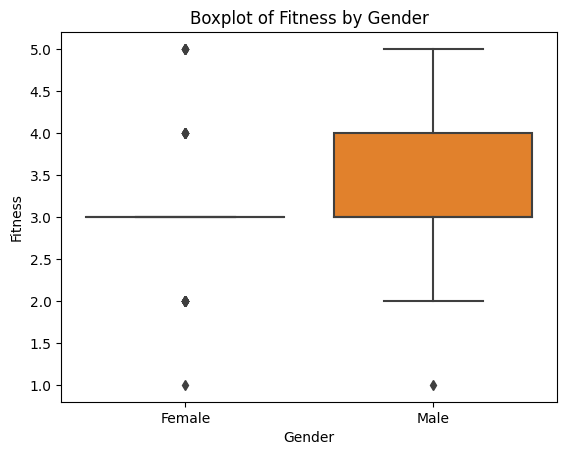

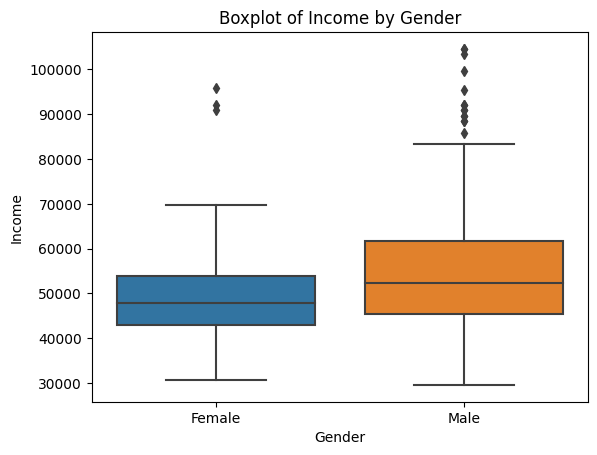

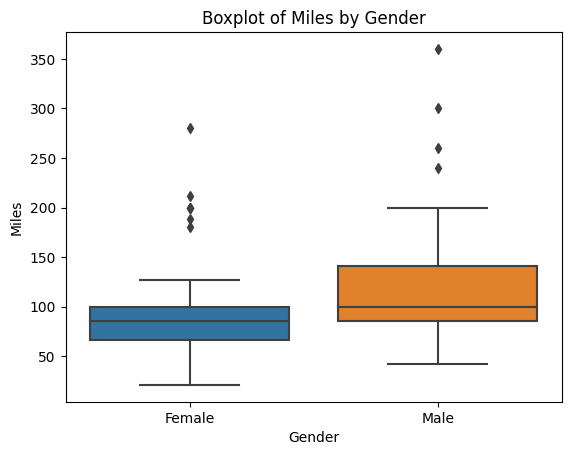

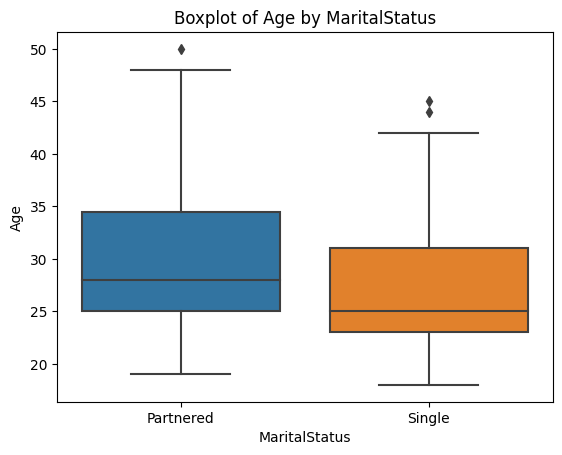

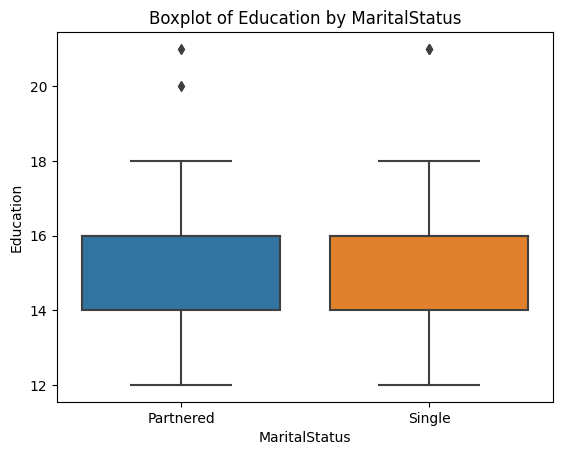

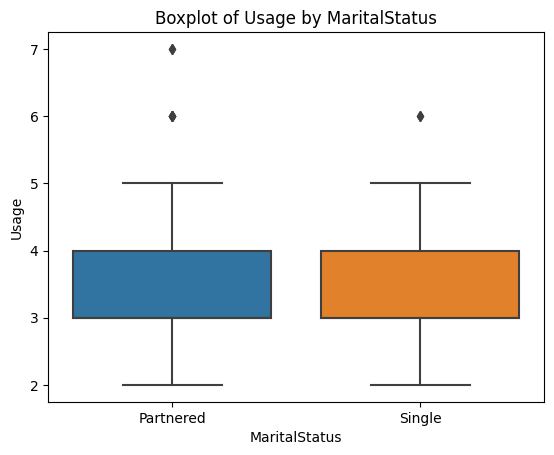

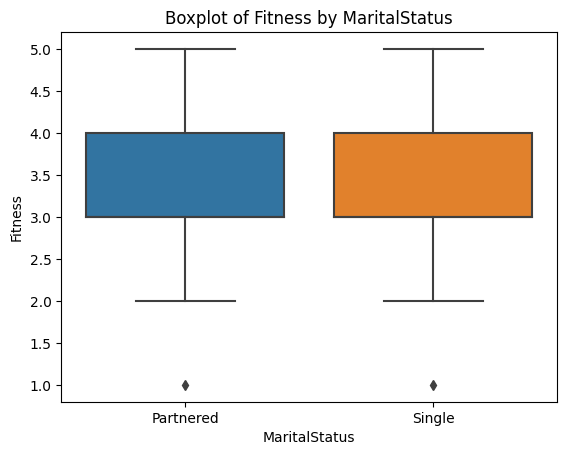

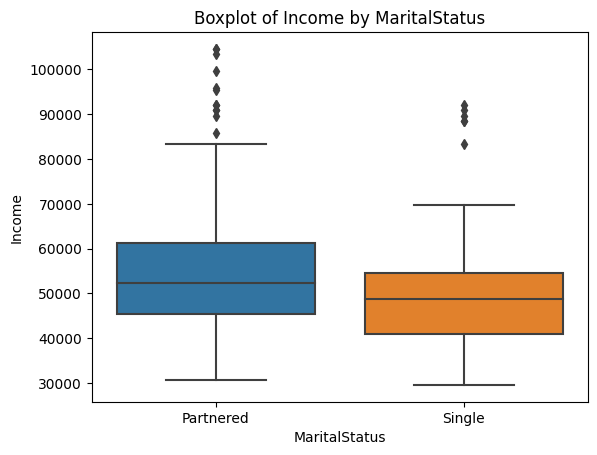

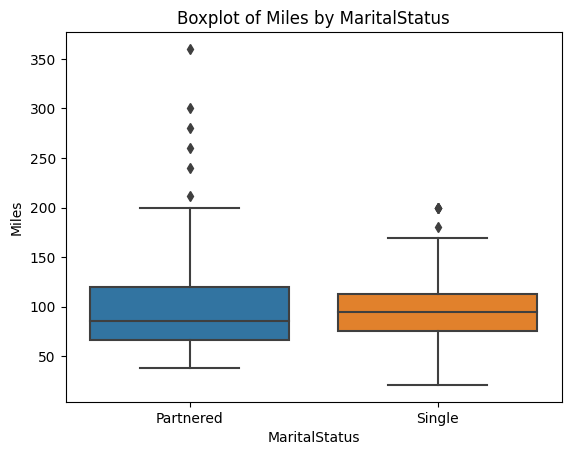

In [ ]:
# Categorical variables: Product, Gender, MaritalStatus
categorical_vars = ['Product', 'Gender', 'MaritalStatus']

for cat_var in categorical_vars:
    for cont_var in continuous_vars:
        sns.boxplot(x=cat_var, y=cont_var, data=df)
        plt.title(f'Boxplot of {cont_var} by {cat_var}')
        plt.show()

Bivariate analysis for Continous Variable vs continuous variable

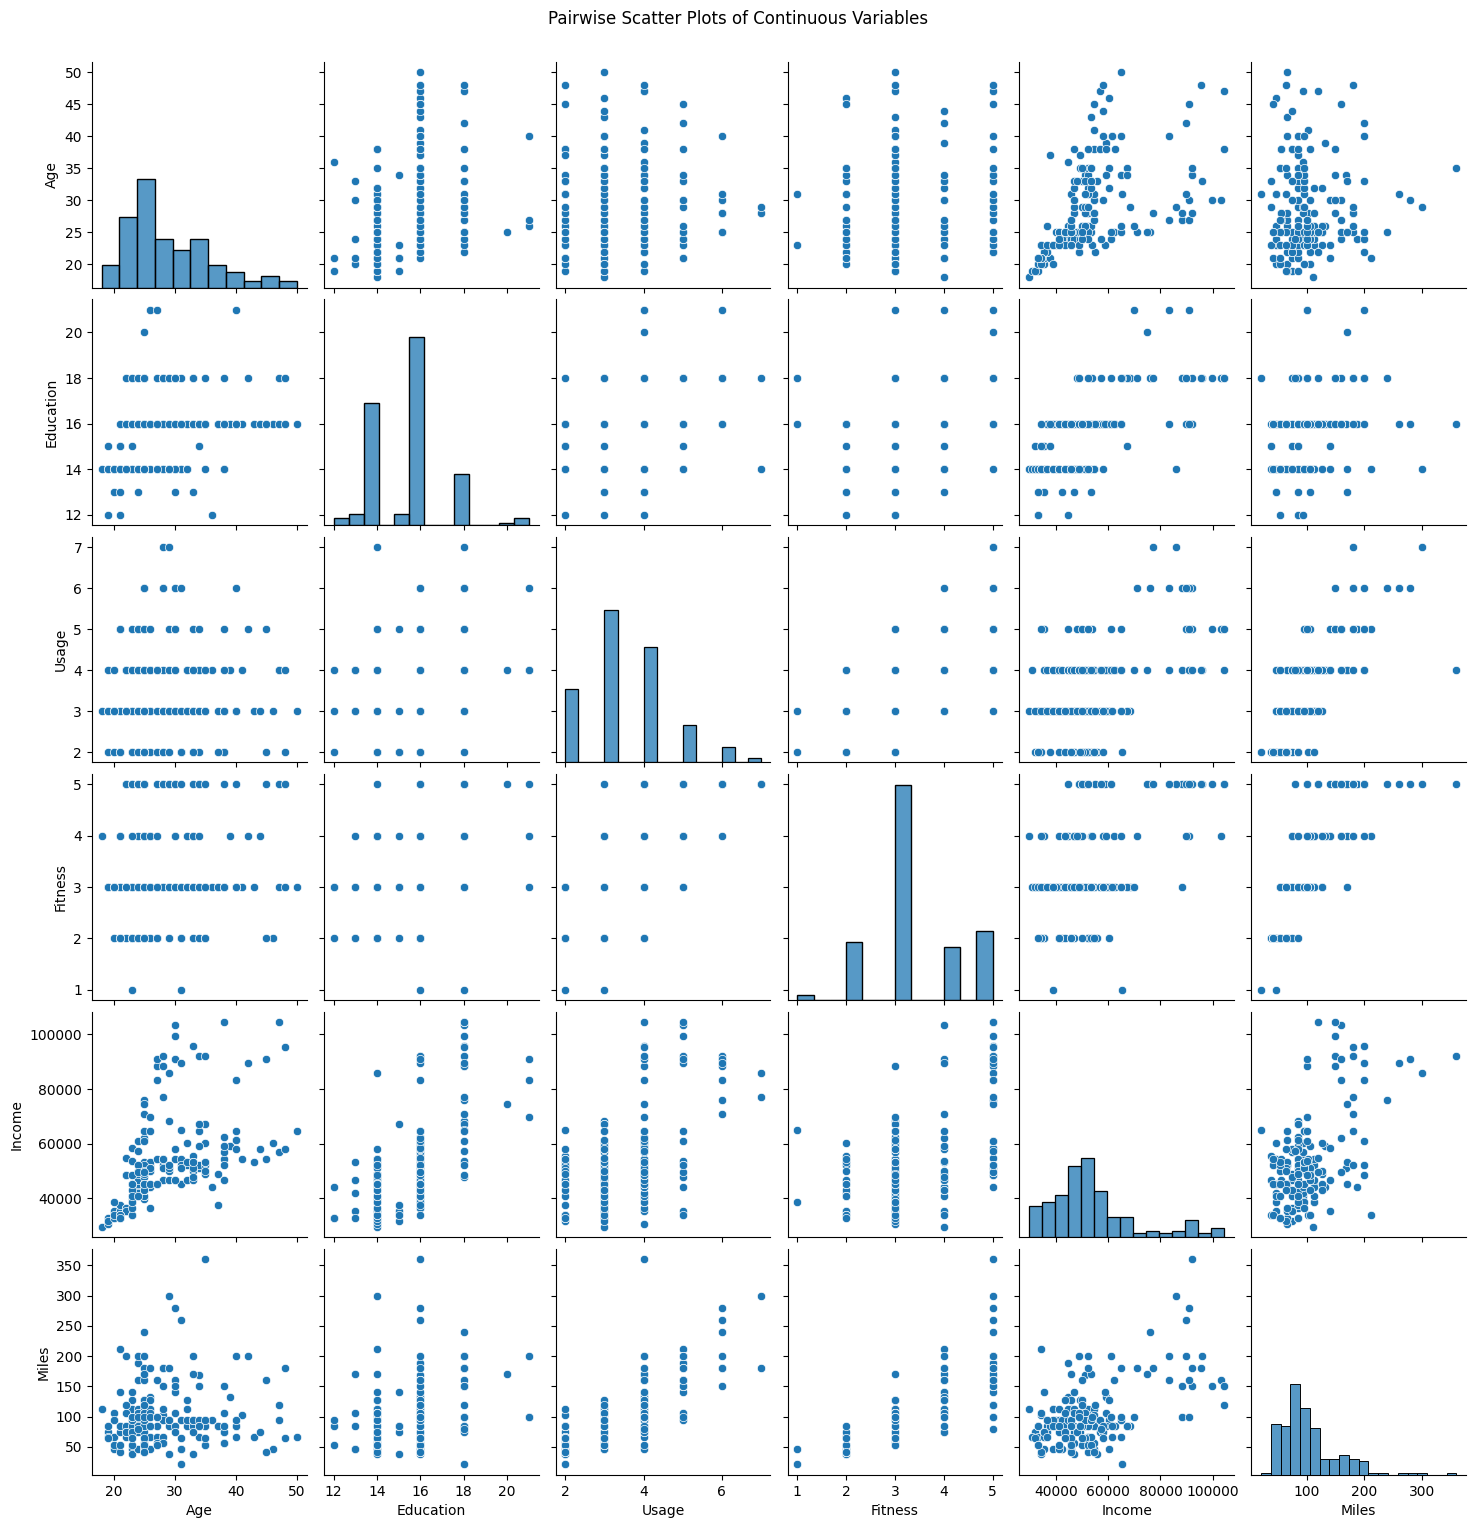

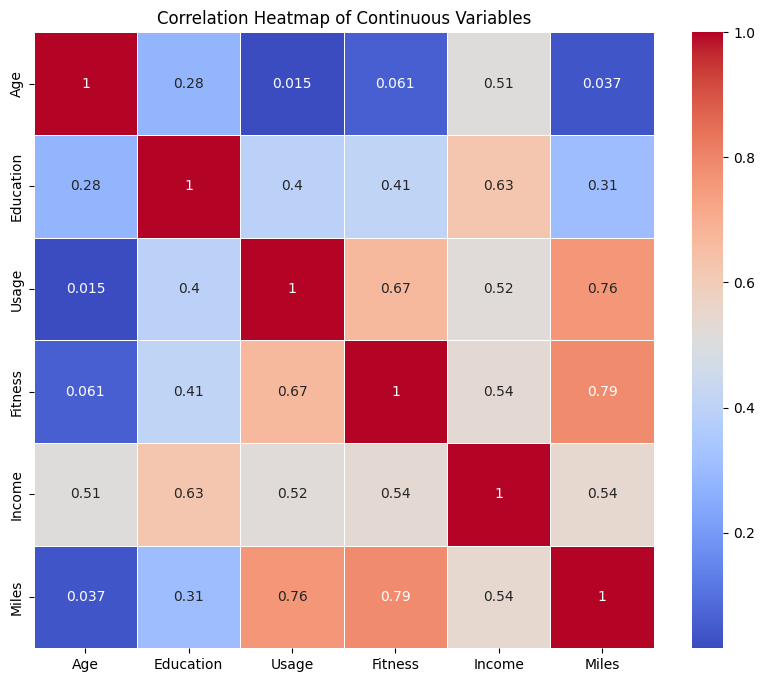

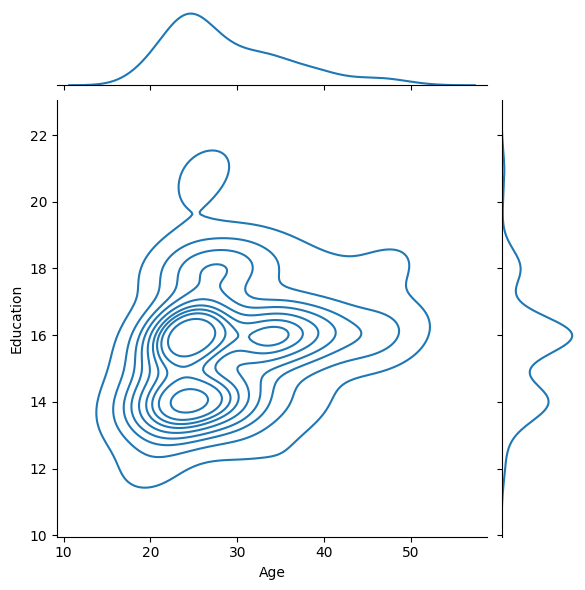

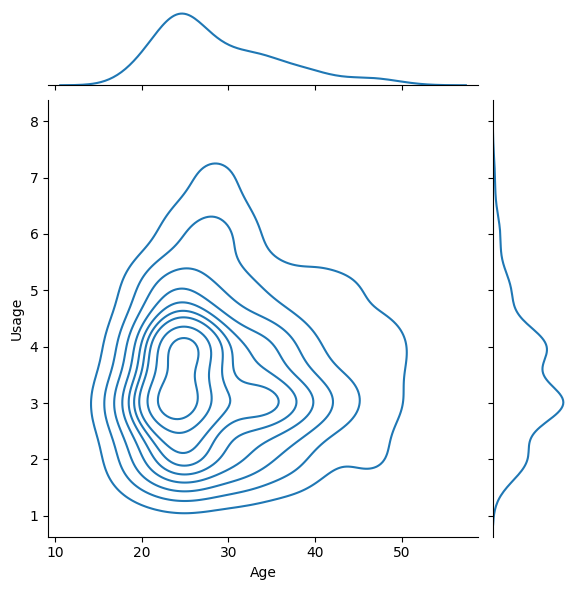

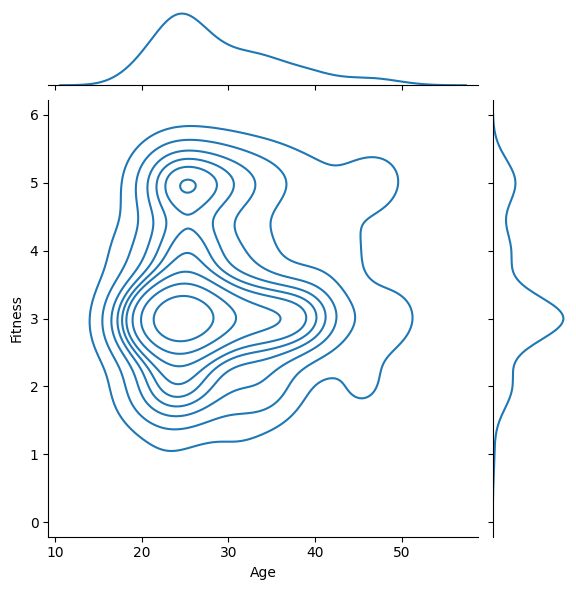

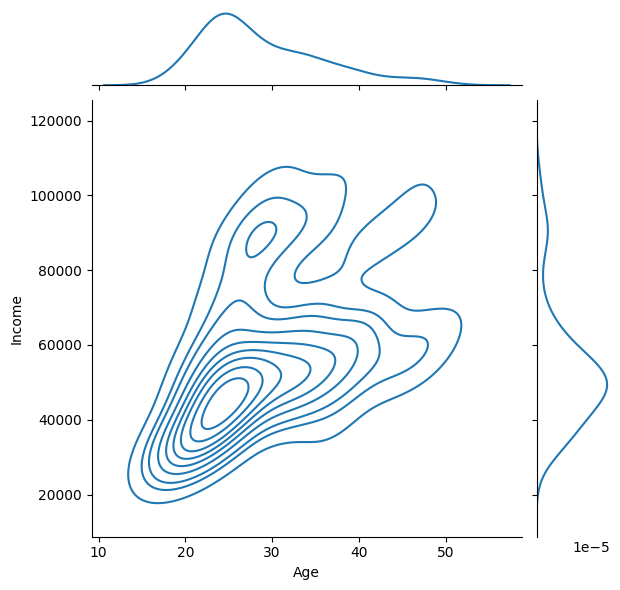

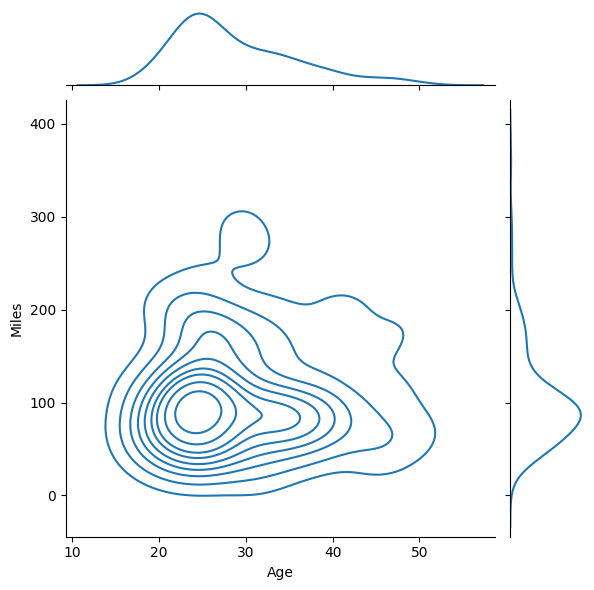

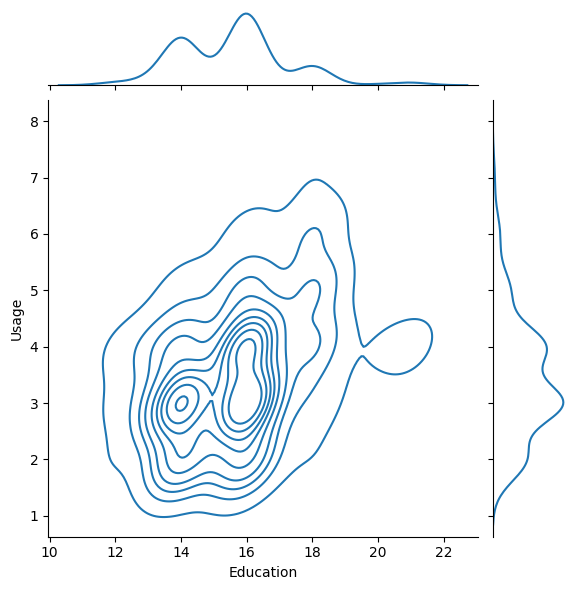

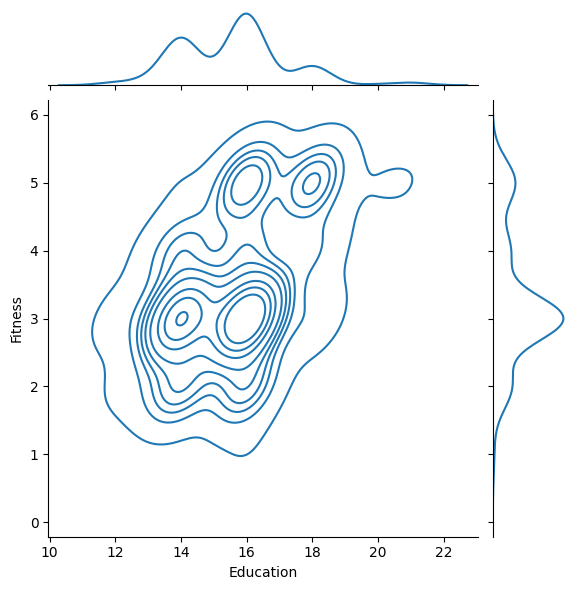

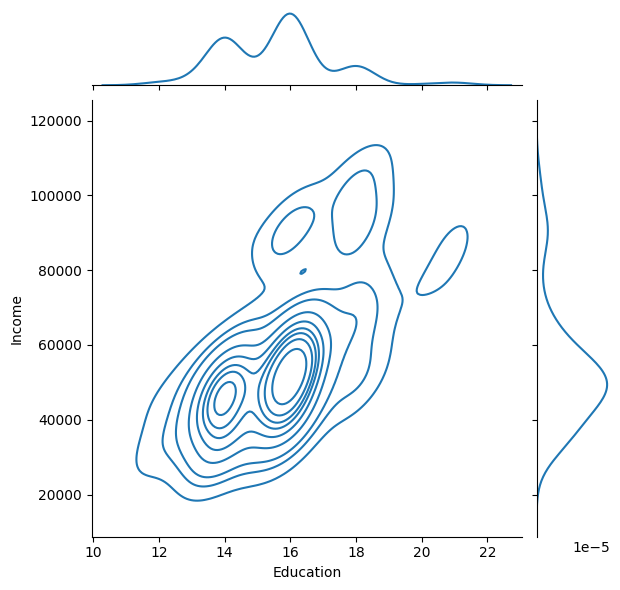

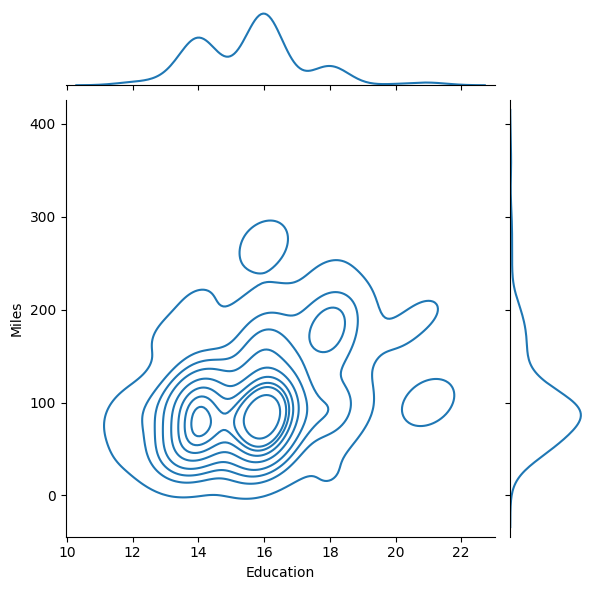

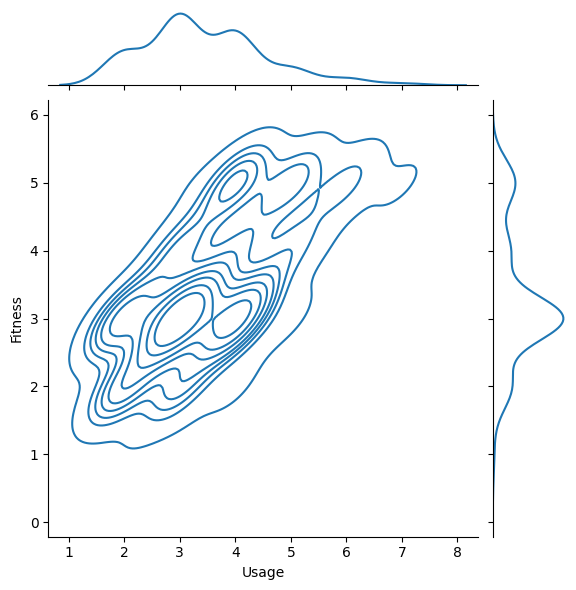

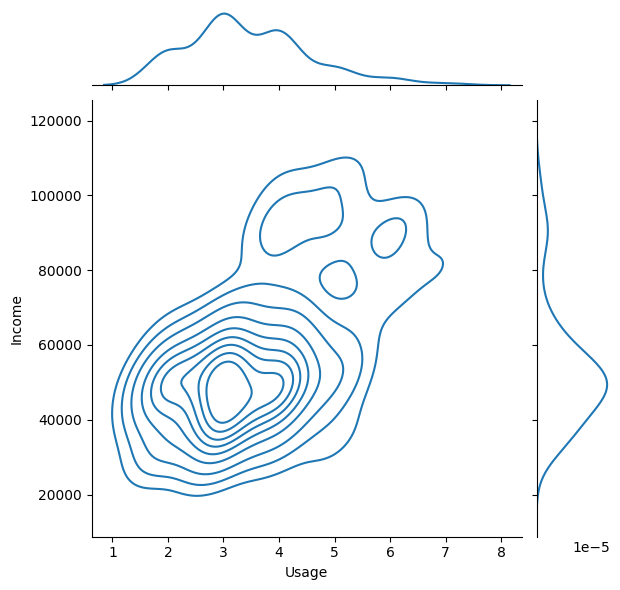

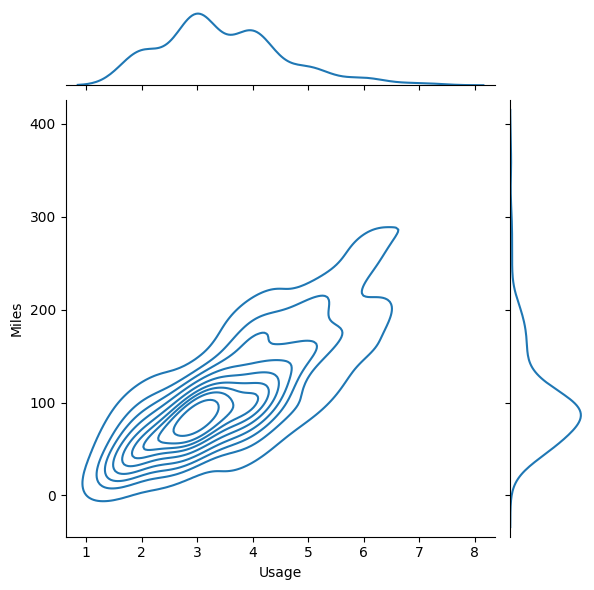

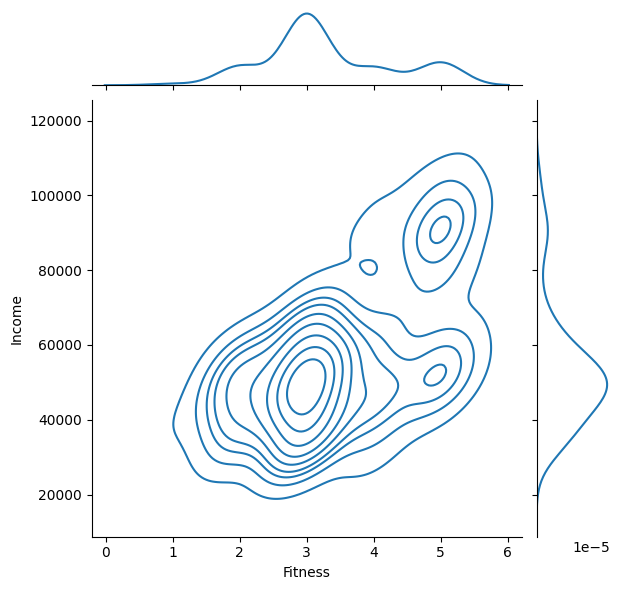

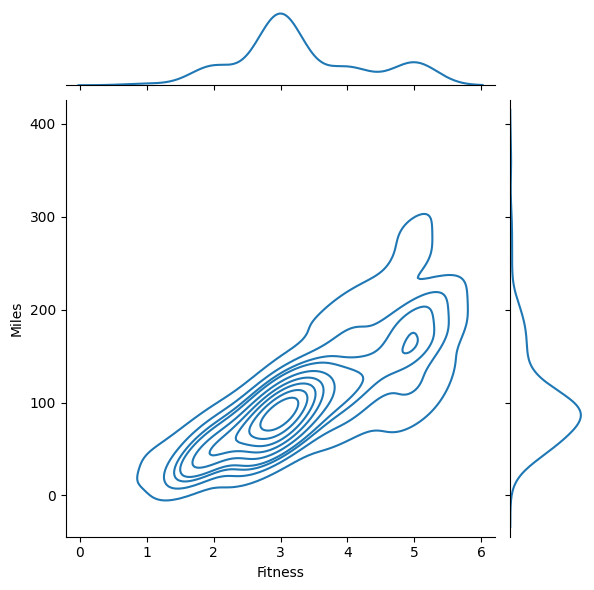

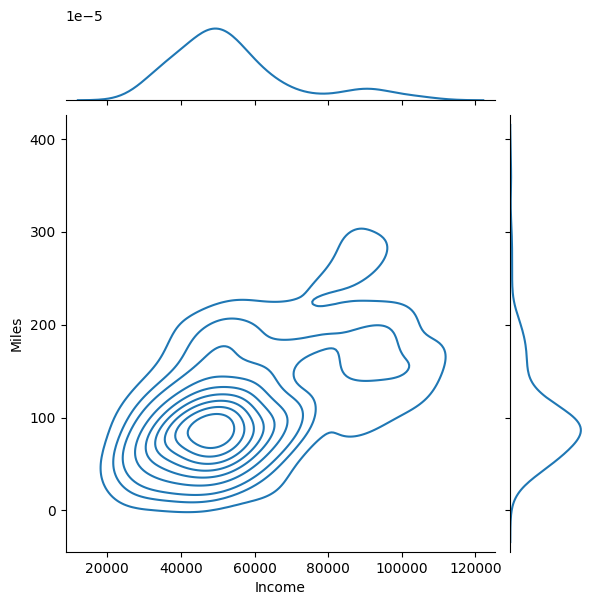

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset into a DataFrame named 'df'
# df = pd.read_csv('path_to_aerofit_dataset.csv')

continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Pairwise scatter plots for all continuous variables
sns.pairplot(df[continuous_vars])
plt.suptitle('Pairwise Scatter Plots of Continuous Variables', y=1.02)
plt.show()

# Correlation heatmap
correlation_matrix = df[continuous_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

# Optionally, if you want to look at joint distributions with KDE for specific pairs
for i in range(len(continuous_vars)):
    for j in range(i+1, len(continuous_vars)):
        sns.jointplot(x=continuous_vars[i], y=continuous_vars[j], data=df, kind='kde')
        plt.show()

Looking Separately into few cases:
1. Age Vs Product
2. Income Vs Product
3. Gender Vs product


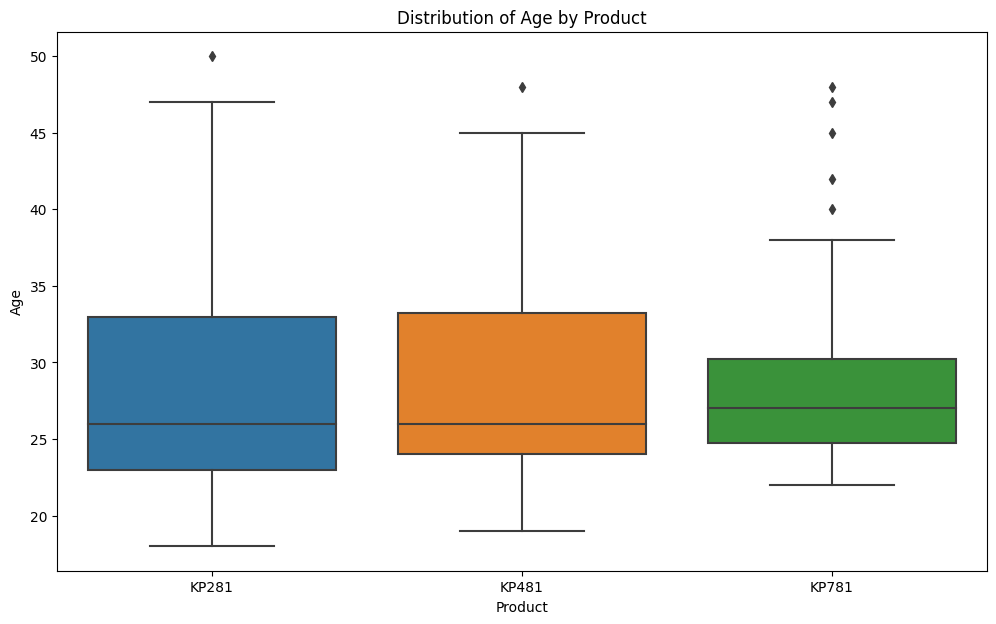

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df['Product'], y=df['Age'])
plt.title('Distribution of Age by Product')
plt.show()

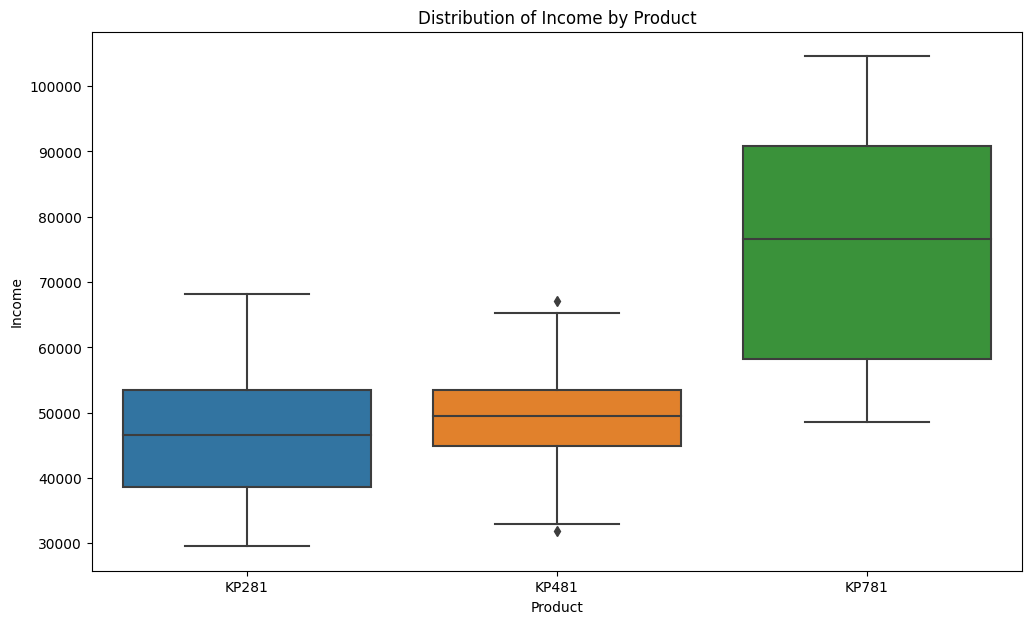

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df['Product'], y=df['Income'])
plt.title('Distribution of Income by Product')
plt.show()

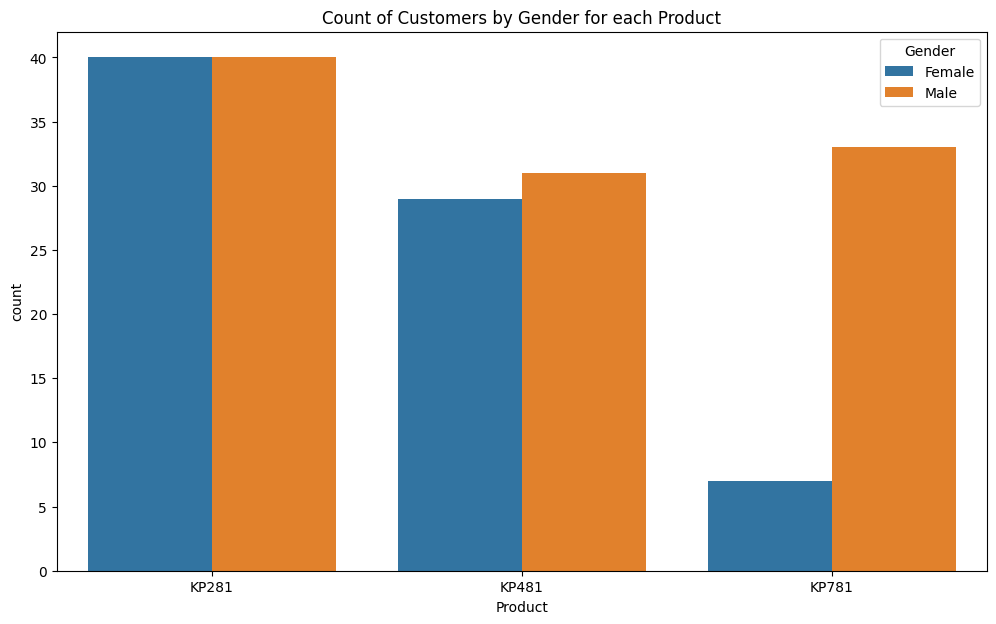

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['Product'], hue=df['Gender'])
plt.title('Count of Customers by Gender for each Product')
plt.show()

### 3.3 Correlation Analysis

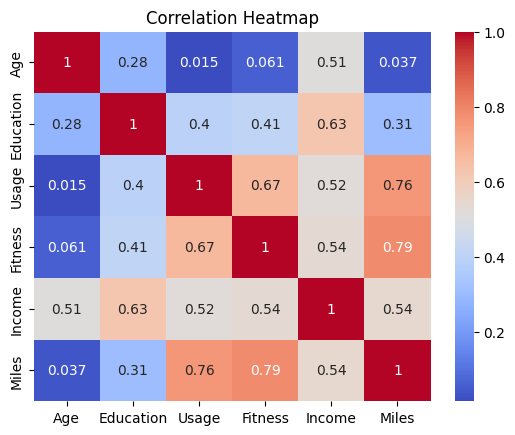

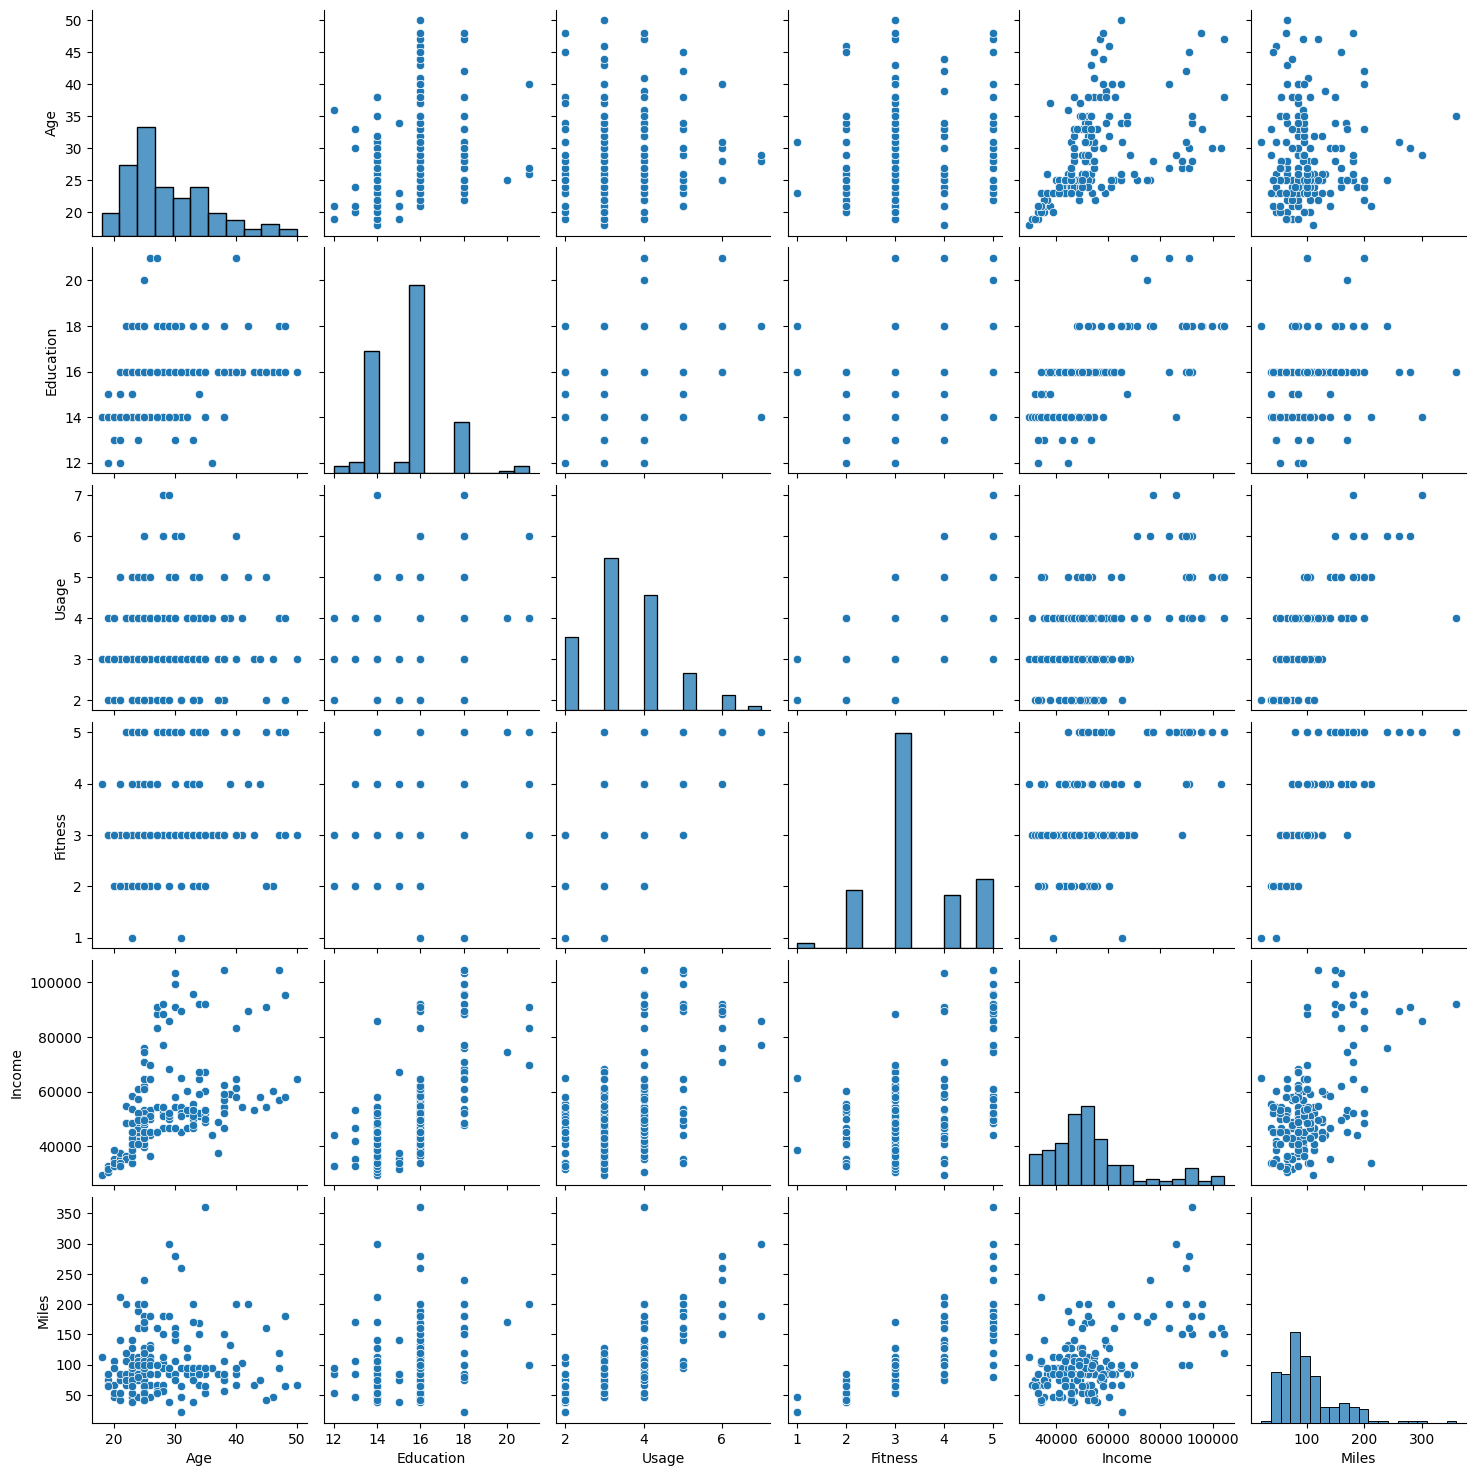

In [ ]:
# Heatmap for correlation
correlation_matrix = df[continuous_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for correlation
sns.pairplot(df[continuous_vars])
plt.show()

## Question 4. Missing Value & Outlier Detection (10 Points)


## 4.1 Missing Value

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values for each column:\n")
missing_values

Missing values for each column:



Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## 4.2 Outlier Detection

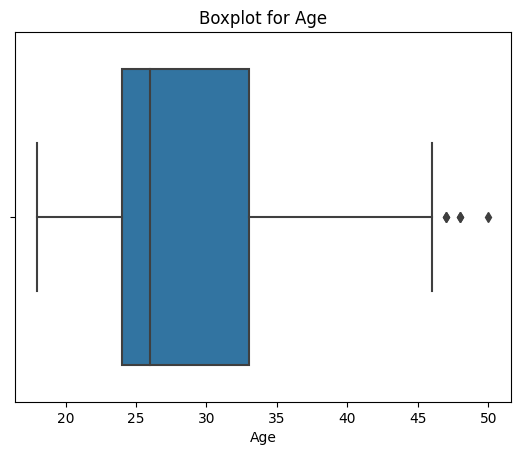

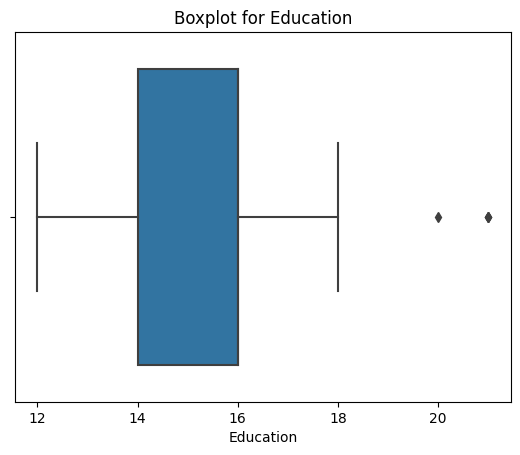

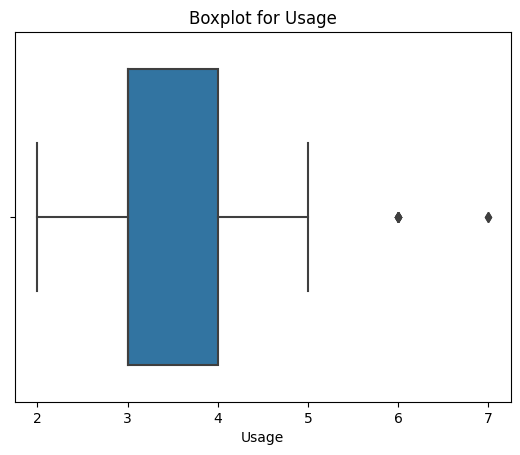

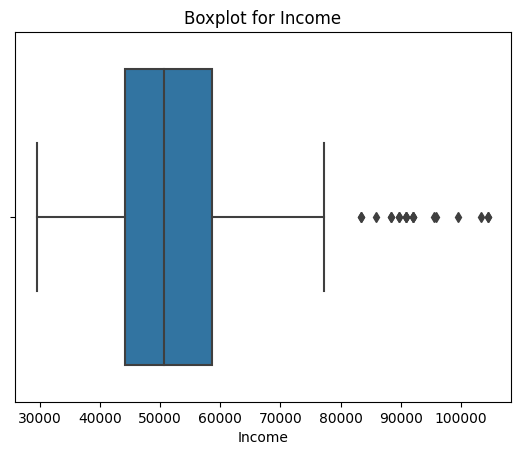

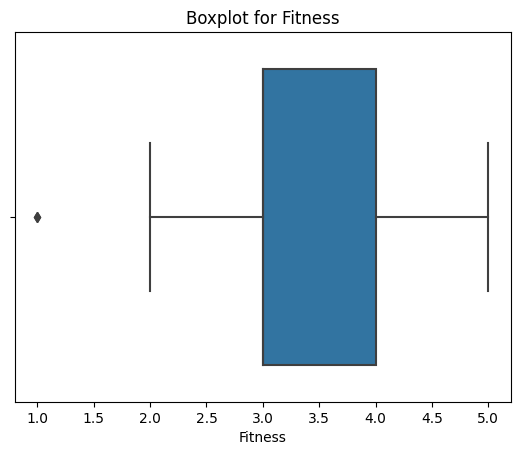

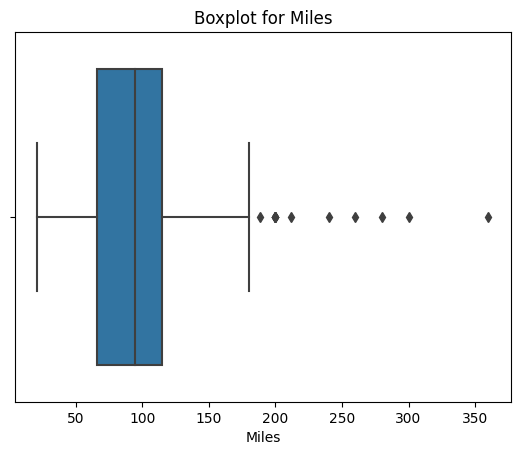

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
detect_outliers(df, 'Age')

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
78    KP281   47    Male         16     Partnered      4        3   56850   
79    KP281   50  Female         16     Partnered      3        3   64809   
139   KP481   48    Male         16     Partnered      2        3   57987   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
78      94  
79      66  
139     64  
178    120  
179    180

In [ ]:
detect_outliers(df, 'Education')

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
156   KP781   25    Male         20     Partnered      4        5   74701   
157   KP781   26  Female         21        Single      4        3   69721   
161   KP781   27    Male         21     Partnered      4        4   90886   
175   KP781   40    Male         21        Single      6        5   83416   

     Miles  
156    170  
157    100  
161    100  
175    200

In [ ]:
detect_outliers(df, 'Usage')

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
154   KP781   25    Male         18     Partnered      6        4   70966   
155   KP781   25    Male         18     Partnered      6        5   75946   
162   KP781   28  Female         18     Partnered      6        5   92131   
163   KP781   28    Male         18     Partnered      7        5   77191   
164   KP781   28    Male         18        Single      6        5   88396   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Female         16     Partnered      6        5   90886   
170   KP781   31    Male         16     Partnered      6        5   89641   
175   KP781   40    Male         21        Single      6        5   83416   

     Miles  
154    180  
155    240  
162    180  
163    180  
164    150  
166    300  
167    280  
170    260  
175    200

In [ ]:
detect_outliers(df, 'Fitness')

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
14    KP281   23    Male         16     Partnered      3        1   38658   
117   KP481   31  Female         18        Single      2        1   65220   

     Miles  
14      47  
117     21

In [ ]:
detect_outliers(df, 'Income')

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
159   KP781   27    Male         16     Partnered      4        5   83416   
160   KP781   27    Male         18        Single      4        3   88396   
161   KP781   27    Male         21     Partnered      4        4   90886   
162   KP781   28  Female         18     Partnered      6        5   92131   
164   KP781   28    Male         18        Single      6        5   88396   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Female         16     Partnered      6        5   90886   
168   KP781   30    Male         18     Partnered      5        4  103336   
169   KP781   30    Male         18     Partnered      5        5   99601   
170   KP781   31    Male         16     Partnered      6        5   89641   
171   KP781   33  Female         18     Partnered      4        5   95866   
172   KP781   34    Male         16        Single      5        5   92131   
173   KP781   35    Male         16     Partnered      4        5   92131   
174   KP781   38    Male         18     Partnered      5        5  104581   
175   KP781   40    Male         21        Single      6        5   83416   
176   KP781   42    Male         18        Single      5        4   89641   
177   KP781   45    Male         16        Single      5        5   90886   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
159    160  
160    100  
161    100  
162    180  
164    150  
166    300  
167    280  
168    160  
169    150  
170    260  
171    200  
172    150  
173    360  
174    150  
175    200  
176    200  
177    160  
178    120  
179    180

In [ ]:
detect_outliers(df, 'Miles')

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
23    KP281   24  Female         16     Partnered      5        5   44343   
84    KP481   21  Female         14     Partnered      5        4   34110   
142   KP781   22    Male         18        Single      4        5   48556   
148   KP781   24  Female         16        Single      5        5   52291   
152   KP781   25  Female         18     Partnered      5        5   61006   
155   KP781   25    Male         18     Partnered      6        5   75946   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Female         16     Partnered      6        5   90886   
170   KP781   31    Male         16     Partnered      6        5   89641   
171   KP781   33  Female         18     Partnered      4        5   95866   
173   KP781   35    Male         16     Partnered      4        5   92131   
175   KP781   40    Male         21        Single      6        5   83416   
176   KP781   42    Male         18        Single      5        4   89641   

     Miles  
23     188  
84     212  
142    200  
148    200  
152    200  
155    240  
166    300  
167    280  
170    260  
171    200  
173    360  
175    200  
176    200

#Question 5. Business Insights based on Non-Graphical and Visual Analysis (10 Points)
1. Comments on the range of attributes
2. Comments on the distribution of the variables and relationship between them
3. Comments for each univariate and bivariate plot

In [ ]:
range_of_attributes = {}
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    range_of_attributes[column] = (df[column].min(), df[column].max())

range_of_attributes

{'Age': (18, 50),
 'Education': (12, 21),
 'Usage': (2, 7),
 'Fitness': (1, 5),
 'Income': (29562, 104581),
 'Miles': (21, 360)}

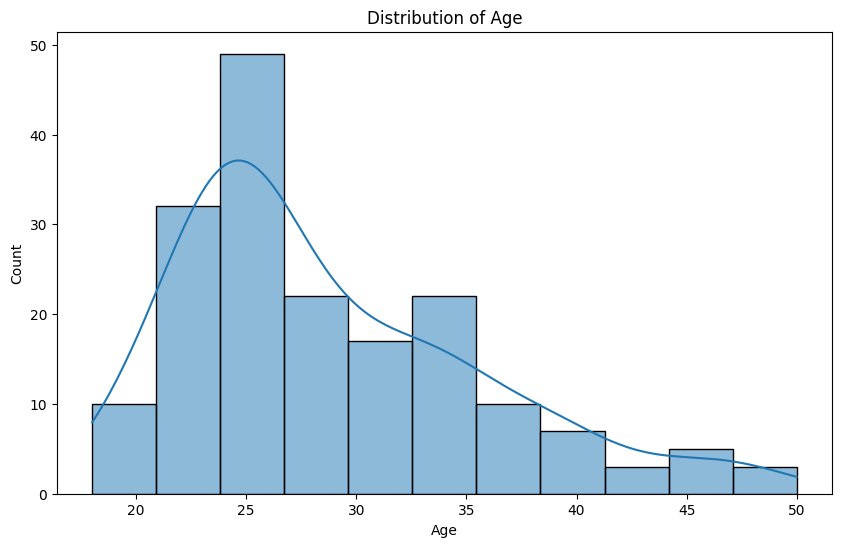

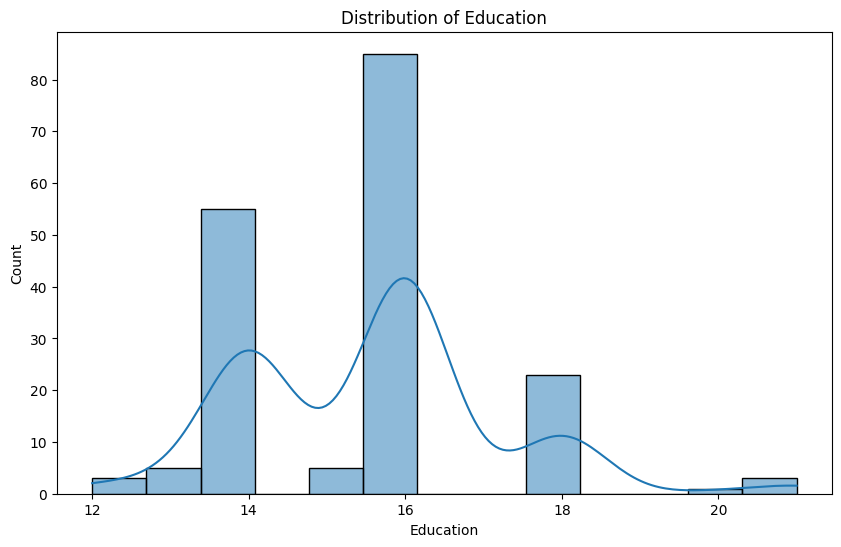

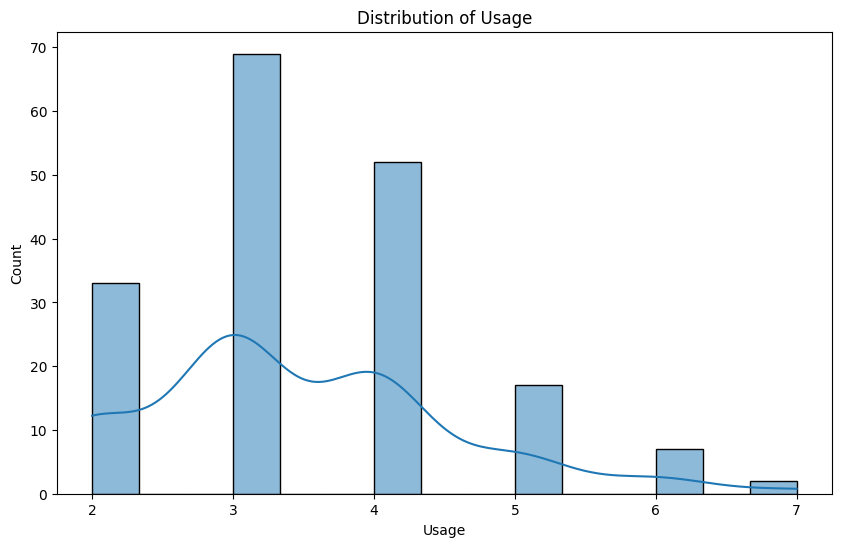

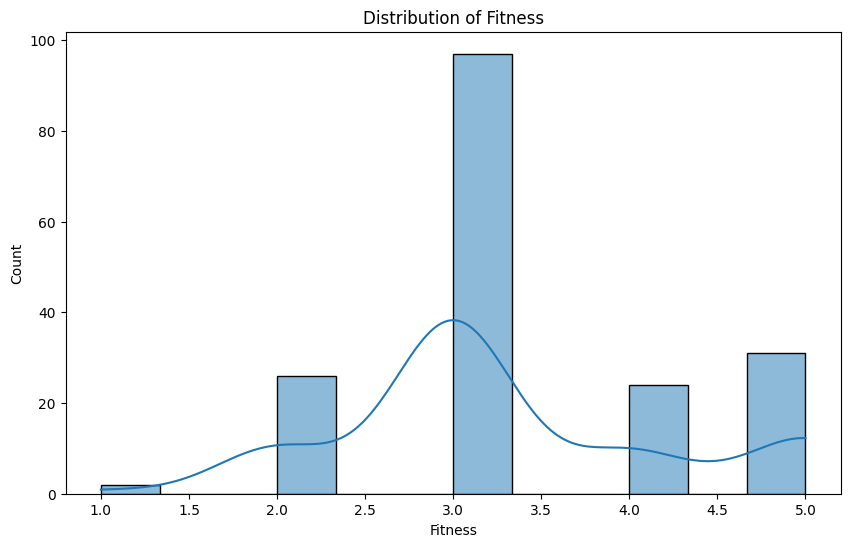

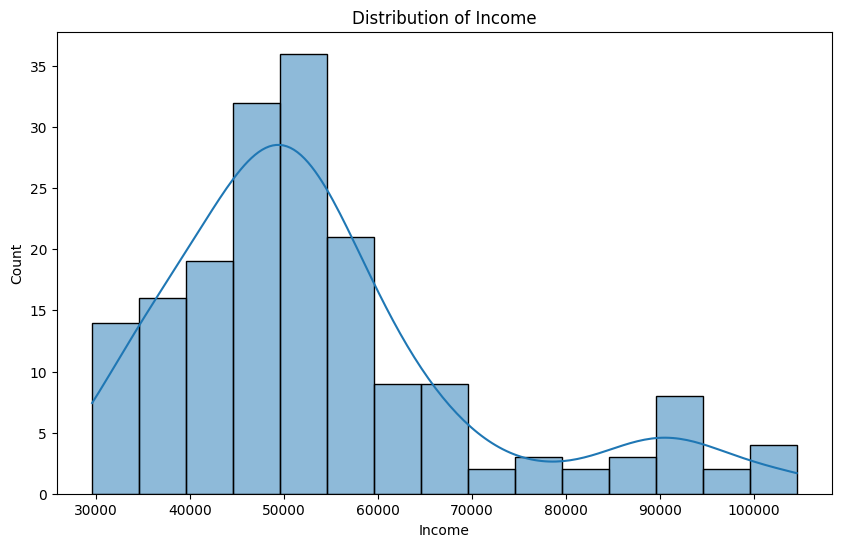

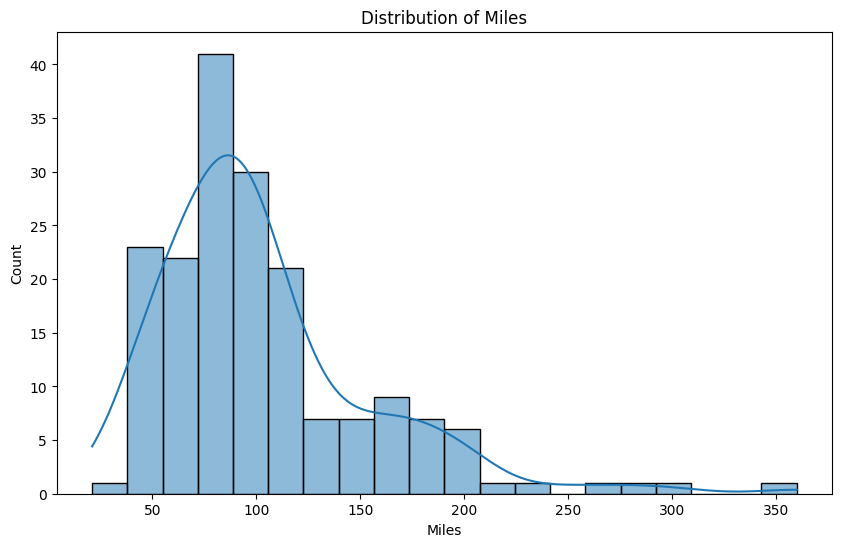

In [ ]:
# Distribution plots
for col in ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



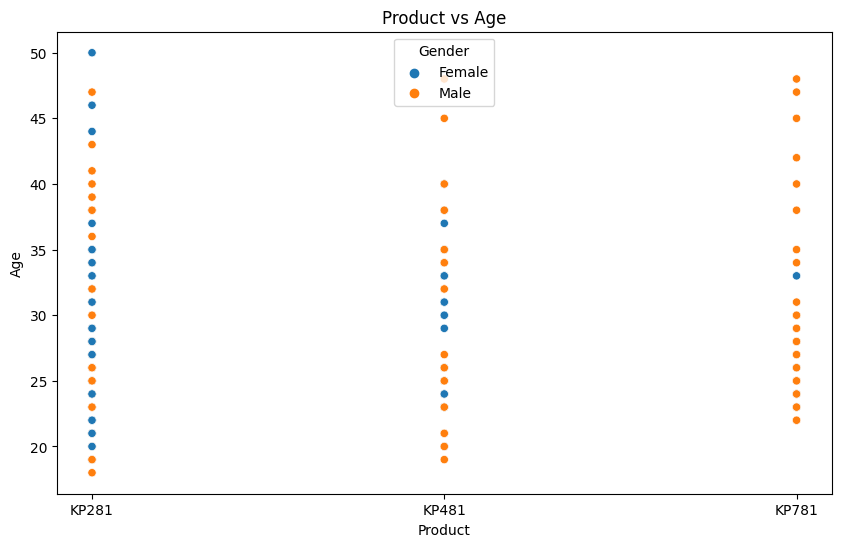

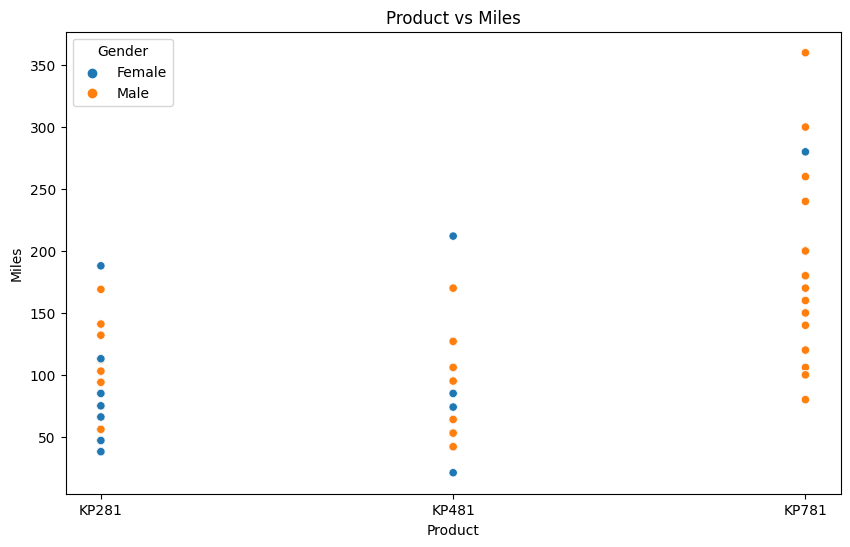

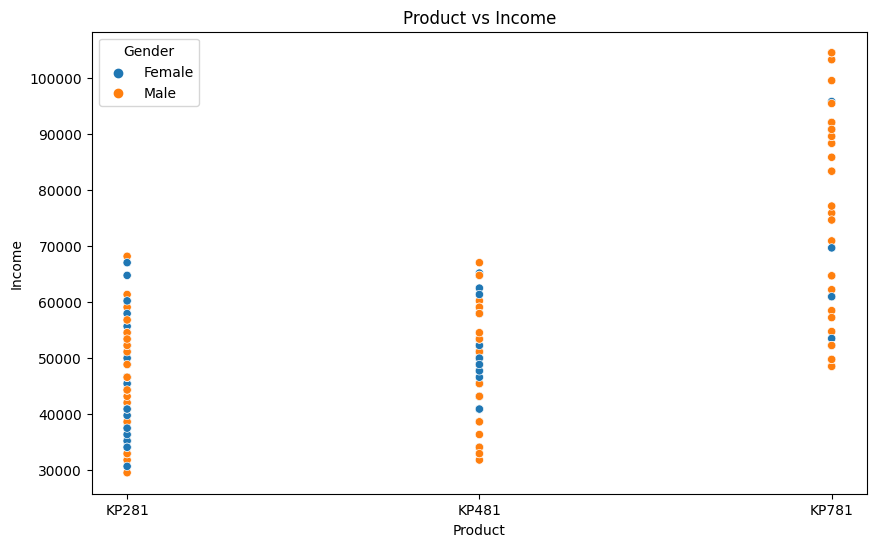

In [ ]:
# Bivariate plots
bivariate_cols = [( 'Product','Age'), ('Product','Miles'),('Product','Income')]
for col1, col2 in bivariate_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col1, y=col2, hue='Gender')
    plt.title(f'{col1} vs {col2}')
    plt.show()



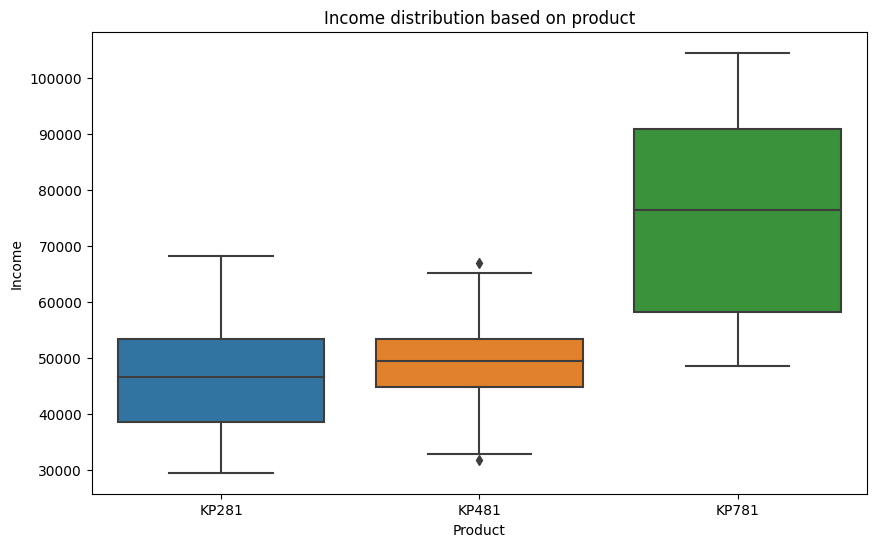

In [ ]:
# Boxplot to check income distribution based on gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Income', x='Product')
plt.title('Income distribution based on product')
plt.show()

## Question 6. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

**Demographics Analysis:**


1. Most users of product KP281 are in their early 20s to mid-30s.
The data includes both male and female users, with both genders being well-represented.


2. Most users are either in a partnered relationship or single.


3. The education level of most users is around 14-16 years, suggesting that most users have some college education or have completed their bachelor's degree.


4. Usage and Fitness:
The 'Usage' and 'Fitness' columns show that many users have a moderate to high usage and fitness level, indicating that the product KP281 might be popular among those who are fairly active or are looking to improve their fitness.


5. Income Analysis:
The income of users varies, but many users seem to fall within the mid-income range. This might suggest that product KP281 is affordable and appeals to a wide range of consumers.


5. Miles Analysis:
The 'Miles' column indicates how much each user expects to run/walk using the product. Many users anticipate moderate to high usage in terms of miles, which again points to the product being popular among active individuals.


6. Product Variation:
While the majority of the data provided is for product KP281, there are entries for product KP481 as well.



---


**Recommendations for Marketing and Sales/ Business actionable items:**


1. Target Young Adults: A significant portion of the users are between ages 18-25. Aerofit should consider marketing campaigns targeting this age group.


2. Focus on Partnered Demographic: Many customers within this dataset are partnered. Design promotional offers or dual membership discounts to attract more partnered individuals.


3. Gender-specific Campaigns: The dataset contains both male and female customers. Aerofit can design gender-specific workout programs or promotions.


4. Higher Education Outreach: Most of the customers have 14-16 years of education. Partner with colleges or institutions for special student offers or campus promotions.


5. Promote Moderate Usage: Most customers fall into the '3' usage category. Offer classes or programs that fit this frequency to retain and attract this customer base.


6. Address Diverse Fitness Levels: While the dataset showcases a range of fitness levels, there's a notable presence in the mid-range (3-4). Ensure there are diverse offerings catering to various fitness levels.


7. Upsell Opportunities: For those with higher incomes, consider upselling premium services or advanced classes.


8. Incentivize Mile Goals: As 'Miles' seem to be a tracked metric, consider creating challenges or rewards for customers who hit certain mile markers.



---


**Further Analysis:**

1. To refine marketing and sales strategies, it might be helpful to get more detailed data on user preferences, reasons for purchasing the product, geographic location, and other factors.


2. Customer feedback and reviews can provide insights into the product's strengths and areas of improvement.


3. Periodically surveying the user base can help in understanding changing trends and adjusting product features and marketing strategies accordingly.
